    
|  |
|----------------------------------------------------------------------| 
|      ![Tremplin des sciences](images/tremplinColorSmall.png)       | 
| ![Logos des partenaires](images/bandeaulogos_sitetremplin.jpg) |


----------------------------------------------------------------------

Cahier d'exercices pour l'enseignement du changement climat climatique ou l'apprentissage de programmation issu de la collection "Climat et météo tremplin pour l'enseignement des sciences" (PIA IFÉ ENS de Lyon - Météofrance ENM Toulouse). Le dispositif clef en main repose sur l'utilisation d'une RaspberryPi chargée avec le système d'exploitation Debian enrichi, produit par le projet. Les sources et les exécutables sont accessibles dans [l'espace collaboratif du pojet à l'IFÉ ENS de Lyon](https://contrib-tremplin.ens-lyon.fr/) et une copie se trouve dans [l'espace collaboratif de la forge github](https://github.com/g-vidal/CahierDeProgrammes); plus d'information sur les [blogs d'accompagnement](http://blog.climatetmeteo.fr/GerardVidal/) systèmes d'exploitation sur [la page des OS  de Raspberries Pi](http://mediaserv.climatetmeteo.fr/images/RaspBerry/DebianStretchPi3/).  Toutes les ressources issues du projet sont fournies sous licence [Creative Commons](https://creativecommons.org/licenses/by-nc/4.0/) ou sous les licences libres d'origine des outils utilisés. 

Les ressources  du projet **peuvent être utilisées dans tout autre environnement compatible**, notamment tous les cahiers d'exercices peuvent être exécutés sur toute machine disposant d'un python3  et des bibliothèques jupyter, jupyterlab, numpy, netcdf4. 

Les données _pré-traitées_ utilisées ci-dessous sont **accessibles  en ligne** sur le [serveur de données géolocalisées](http://geoloc-tremplin.ens-lyon.fr/climato-data/) `opendap` du projet tremplin.

Auteur : G. Vidal

![licence : Creative Commons](images/Licence.jpg) 


------------------------------------------------------------

# Une approche des enseignements autour du changement climatique : mitigation et adaptation au changement
# _Approche du changement climatique, comparaison Toulouse-Lyon : évolution des températures maximales, minimales et de la pluviométrie jusqu'en 2100_

Ce cahier d'exercices utilise  les données collectées par le projet Tremplin sur les villes de Toulouse et Lyon et ses environs à partir du [site DRIAS](http://www.drias-climat.fr/), converties pré-traitées et mises en ligne  sur le [serveur de données climatologiques](http://geoloc-tremplin.ens-lyon.fr/climato-data/Toulouse-1/t_min-t_max-rstr_Toulouse-1_26-45-85.nc.info) du projet Tremplin des sciences. Les conversions et pré-traitements ont été réalisés avec les cahiers de programme `ipython` des phases 1 & 2 de cette série disponibles sur la [forge du projet](https://contrib-tremplin.ens-lyon.fr/forge/Tremplin-des-Sciences/CahiersDeProgrammesClimat/files/tip/). Ce cahier propose plusieurs voies d'exploration du jeu de données _température max / température min / pluviométrie_ sur une grille de 104 x 104 km autour de Toulouse et Lyon, ainsi que les comparaisons entre l'évolution de ces deux villes. 

L'étude aborde l'évolution des variables moyennées sur N années (N a été fixé à 30 par défaut mais peut être modifié)  sur 13 noeuds centrés sur les villes. 

Le lot utilisé  est issu des trois modélisation RCP 2.6 4.5 et 8.5 fournies par météofrance. Ce cahier est immédiatement opérationnel et peut directement être exécuté sur  `jupyter` ou `jupyterlab`, toutefois il manipule des données multidimensionnelles et doit être réservé à des étudiants avancés si l'on souhaite manipuler le code. Par contre l'utilisation des blocs concernant le tracé des courbes ou des cartes est d'un usage facile d'accès et permet d'obtenir simplement des figures. Attention le dessin des figures a été désactivé dans le dépôt sur la forge pour ne pas alourdir inutilement le fichier transféré, il suffit de décommenter la dernière ligne de chacun des blocs de dessin en enlevant le `"`.

## Préparation de l'environnement et ouverture du fichier de données

Importer d'abord le module `netcdf4` et `numpy`, attention les majuscules sont impératives pour le nom `netCDF4`. Ces deux modules permettent de traiter  les fichiers multidimensionnels au format netCDF utilisés dans le monde de la météorologie et de l'océanographie principalement.

In [1]:
import netCDF4 as nc
import numpy as np
from datetime import datetime
from array import array
import sys, datetime, os

Importer ensuite les données de sortie de modèle depuis le fichier obtenu auprès du [serveur de données climatologiques](http://geoloc-tremplin.ens-lyon.fr/climato-data/Toulouse-1/t_min-t_max-rstr_Toulouse-1_26-45-85.nc.info) du projet Tremplin des sciences extrait du site [DRIAS](https://drias-prod.meteo.fr/okapi/accueil/okapiWebDrias/index.jsp) sur la région toulousaine.

L'exemple utilisé ici a été réalisé avec une grille de 13 x 13 noeuds centrés sur les villes de Toulouse et Lyon, pour obtenir un jeu de données se reporter au manuel numérique réalisé par Éric le Jan et Carole Larose dans le cadre du projet "Climat et Météo Tremplin pour l'enseignement des sciences". Les instructions d'affichage commentées (pour la plupart) permettent de vérifier les propriétés  du fichier obtenu ainsi que les variables qui pourront être utilisées. Ces affichages sont facultatifs et peuvent être commentés sans conséquence pour la suite.

In [2]:
# Importation depuis le serveur en ligne du projet
# dataSetTlse = nc.Dataset('http://geoloc-tremplin.ens-lyon.fr/climato-data/Toulouse-1/t_min-t_max-rstr_Toulouse-1_26-45-85.nc')
# La ligne ci-dessous permet d'exploiter des données locales si l'usager réalise lui-même les extractions sur DRIAS
dataSetTlse = nc.Dataset('/home/vidal/TremplinDesSciences/2019/ClimatDrias/ConvertedDrias/Toulouse-1/t_min-t_max-rstr_2019-08-28-10:31_26-45-85.nc') #to use local file
dataSetLyon = nc.Dataset('/home/vidal/TremplinDesSciences/2019/ClimatDrias/ConvertedDrias/Lyon-1/t_min-t_max-rstr_2019-08-28-09:39_26-45-85.nc') #to use local file
dataSetLeCh = nc.Dataset('/home/vidal/TremplinDesSciences/2019/ClimatDrias/ConvertedDrias/LeChambonSurLignon/t_min-t_max-rstr_2019-08-28-10:57_26-45-85.nc') #to use local file
print('Description des données Toulouse issues du modèle : \n',dataSetTlse,'\n') 
print('Variables disponibles :',dataSetTlse.variables.keys()) # get all variable names
print('\nDescription des données Lyon issues du modèle : \n',dataSetLyon,'\n') 
print('Variables disponibles :',dataSetLyon.variables.keys()) # get all variable names
print('\nDescription des données Le Chambon sur Lignon issues du modèle : \n',dataSetLeCh,'\n') 
print('Variables disponibles :',dataSetLeCh.variables.keys()) # get all variable names
#print('Taille du tableau tasmax :',dataSetTlse.variables['tasmax'].shape ,'\n') 

Description des données Toulouse issues du modèle : 
 <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Extrait TSMax par moyenne mensuelle de 2006 a 2100 Lyon et sa region
    institution: ENS de Lyon
    institute_id: IFE Institut Francais de l Education
    project_id: Climat et meteo tremplin pour l enseignement des sciences
    model_id: CNRM-ALADIN52
    product: output derived from Meteofrance DRIAS data
    contact: gerard.vidal@ens-lyon.fr
    creation_date: 2019-08-28 10:31:18.933768
    driving_experiment_name: DRIAS2014
    experiment: RCP2.6 RCP4.5 RCP8.5 
    model: ALADIN-Climat
    author: Gerard Vidal
    comment: Extraction des moyennes de la region Lyonnaise de 2006 a 2100 et changegement des variables
    dimensions(sizes): i(13), j(13), month(13), year(95)
    variables(dimensions): int32 i(i), int32 j(j), float32 lat(j,i), float32 lon(j,i), int32 x(i), int32 y(j), <class 'str'> month(month), uint32 year(year), float32

## Liste des dimensions et des variables du système de données

À partir de la liste des variables obtenue ci-dessus on renomme les jeux de données de chacune des variables qui seront exploitées apour effectuer les calculs et contrôler la taille des échantillons. Les affichages proposés permettent de contrôler que les paramètres présents sont effectivement ceux qui sont attendus.

In [3]:
# Toulouse
for dim in dataSetTlse.dimensions.items():
    print(dim)
print ('\nToulouse :\n----------\nVariables \t  Forme \t\t Taille \t type :  \n')
for var in dataSetTlse.variables.keys() :
    print (var, '\t\t', 
           dataSetTlse.variables[var].dimensions, '\t\t', 
           dataSetTlse.variables[var].shape, '\t', 
           dataSetTlse.variables[var].dtype)
# Lyon    
for dim in dataSetLyon.dimensions.items():
    print(dim)
print ('\nLyon :\n------\nVariables \t  Forme \t\t Taille \t type :  \n')
for var in dataSetLyon.variables.keys() :
    print (var, '\t\t', 
           dataSetLyon.variables[var].dimensions, '\t\t', 
           dataSetLyon.variables[var].shape, '\t', 
           dataSetLyon.variables[var].dtype)

    # Lyon    
for dim in dataSetLeCh.dimensions.items():
    print(dim)
print ('\nLe Chambon sur Lignon :\n-----------------------\nVariables \t  Forme \t\t Taille \t type :  \n')
for var in dataSetLyon.variables.keys() :
    print (var, '\t\t', 
           dataSetLeCh.variables[var].dimensions, '\t\t', 
           dataSetLeCh.variables[var].shape, '\t', 
           dataSetLeCh.variables[var].dtype)


('i', <class 'netCDF4._netCDF4.Dimension'>: name = 'i', size = 13
)
('j', <class 'netCDF4._netCDF4.Dimension'>: name = 'j', size = 13
)
('month', <class 'netCDF4._netCDF4.Dimension'>: name = 'month', size = 13
)
('year', <class 'netCDF4._netCDF4.Dimension'>: name = 'year', size = 95
)

Toulouse :
----------
Variables 	  Forme 		 Taille 	 type :  

i 		 ('i',) 		 (13,) 	 int32
j 		 ('j',) 		 (13,) 	 int32
lat 		 ('j', 'i') 		 (13, 13) 	 float32
lon 		 ('j', 'i') 		 (13, 13) 	 float32
x 		 ('i',) 		 (13,) 	 int32
y 		 ('j',) 		 (13,) 	 int32
month 		 ('month',) 		 (13,) 	 <class 'str'>
year 		 ('year',) 		 (95,) 	 uint32
t_max_26 		 ('year', 'month', 'j', 'i') 		 (95, 13, 13, 13) 	 float32
t_max_45 		 ('year', 'month', 'j', 'i') 		 (95, 13, 13, 13) 	 float32
t_max_85 		 ('year', 'month', 'j', 'i') 		 (95, 13, 13, 13) 	 float32
t_min_26 		 ('year', 'month', 'j', 'i') 		 (95, 13, 13, 13) 	 float32
t_min_45 		 ('year', 'month', 'j', 'i') 		 (95, 13, 13, 13) 	 float32
t_min_85 		 ('year', 'm

## Création des tableaux de calcul

In [4]:
# Toulouse

Tlse_tmax26 = dataSetTlse.variables['t_max_26']  # variable temperature 
Tlse_tmax45 = dataSetTlse.variables['t_max_45']  # variable temperature 
Tlse_tmax85 = dataSetTlse.variables['t_max_85']  # variable temperature 
Tlse_tmin26 = dataSetTlse.variables['t_min_26']  # variable temperature 
Tlse_tmin45 = dataSetTlse.variables['t_min_45']  # variable temperature 
Tlse_tmin85 = dataSetTlse.variables['t_min_85']  # variable temperature 
Tlse_rstr26 = dataSetTlse.variables['rstr_26']  # variable rainfall 
Tlse_rstr45 = dataSetTlse.variables['rstr_45']  # variable rainfall 
Tlse_rstr85 = dataSetTlse.variables['rstr_85']  # variable rainfall 
Tlse_rstrc26 = dataSetTlse.variables['rstrc_26']  # variable cumulated rainfall 
Tlse_rstrc45 = dataSetTlse.variables['rstrc_45']  # variable cumulated rainfall 
Tlse_rstrc85 = dataSetTlse.variables['rstrc_85']  # variable cumulated rainfall 
Tlse_delta26 = dataSetTlse.variables['delta_t_26']  # variable tmax -tmin daily
Tlse_delta45 = dataSetTlse.variables['delta_t_45']  # variable tmax -tmin daily
Tlse_delta85 = dataSetTlse.variables['delta_t_85']  # variable tmax -tmin daily
# Tlse_month = nc.chartostring(dataSetTlse.variables['month'][:])  # variable temps
# use the following syntax on local files
Tlse_month = dataSetTlse.variables['month'] #if local file type = string
Tlse_year = dataSetTlse.variables['year']  # variable temps

#test = nc.chartostring(dataSetTlse.variables['month'][:])
#print(test)
#test[:] = nc.chartostring(dataSetTlse.variables['month'][:],encoding='utf-8')
#print(test)

Tlse_lat,Tlse_lon = dataSetTlse.variables['lat'], dataSetTlse.variables['lon']  # latitude longitude
Tlse_x,Tlse_y = dataSetTlse.variables['x'], dataSetTlse.variables['y']  # coordonnées métriques
Tlse_gridi,Tlse_gridj = dataSetTlse.variables['i'], dataSetTlse.variables['j'] # coordonnées grille Aladin

#Lyon

Lyon_tmax26 = dataSetLyon.variables['t_max_26']  # variable temperature 
Lyon_tmax45 = dataSetLyon.variables['t_max_45']  # variable temperature 
Lyon_tmax85 = dataSetLyon.variables['t_max_85']  # variable temperature 
Lyon_tmin26 = dataSetLyon.variables['t_min_26']  # variable temperature 
Lyon_tmin45 = dataSetLyon.variables['t_min_45']  # variable temperature 
Lyon_tmin85 = dataSetLyon.variables['t_min_85']  # variable temperature 
Lyon_rstr26 = dataSetLyon.variables['rstr_26']  # variable rainfall 
Lyon_rstr45 = dataSetLyon.variables['rstr_45']  # variable rainfall 
Lyon_rstr85 = dataSetLyon.variables['rstr_85']  # variable rainfall 
Lyon_rstrc26 = dataSetLyon.variables['rstrc_26']  # variable cumulated rainfall 
Lyon_rstrc45 = dataSetLyon.variables['rstrc_45']  # variable cumulated rainfall 
Lyon_rstrc85 = dataSetLyon.variables['rstrc_85']  # variable cumulated rainfall 
Lyon_delta26 = dataSetLyon.variables['delta_t_26']  # variable tmax -tmin daily
Lyon_delta45 = dataSetLyon.variables['delta_t_45']  # variable tmax -tmin daily
Lyon_delta85 = dataSetLyon.variables['delta_t_85']  # variable tmax -tmin daily
#Lyon_month = nc.chartostring(dataSetLyon.variables['month'][:])  # variable temps
# use the following syntax on local files
Lyon_month = dataSetLyon.variables['month'] #if local file type = string
Lyon_year = dataSetLyon.variables['year']  # variable temps

#test = nc.chartostring(dataSetLyon.variables['month'][:])
#print(test)
#test[:] = nc.chartostring(dataSetLyon.variables['month'][:],encoding='utf-8')
#print(test)

Lyon_lat,Lyon_lon = dataSetLyon.variables['lat'], dataSetLyon.variables['lon']  # latitude longitude
Lyon_x,Lyon_y = dataSetLyon.variables['x'], dataSetLyon.variables['y']  # coordonnées métriques
Lyon_gridi,Lyon_gridj = dataSetLyon.variables['i'], dataSetLyon.variables['j'] # coordonnées grille Aladin

#le Chambon sur Lignon

LeCh_tmax26 = dataSetLeCh.variables['t_max_26']  # variable temperature 
LeCh_tmax45 = dataSetLeCh.variables['t_max_45']  # variable temperature 
LeCh_tmax85 = dataSetLeCh.variables['t_max_85']  # variable temperature 
LeCh_tmin26 = dataSetLeCh.variables['t_min_26']  # variable temperature 
LeCh_tmin45 = dataSetLeCh.variables['t_min_45']  # variable temperature 
LeCh_tmin85 = dataSetLeCh.variables['t_min_85']  # variable temperature 
LeCh_rstr26 = dataSetLeCh.variables['rstr_26']  # variable rainfall 
LeCh_rstr45 = dataSetLeCh.variables['rstr_45']  # variable rainfall 
LeCh_rstr85 = dataSetLeCh.variables['rstr_85']  # variable rainfall 
LeCh_rstrc26 = dataSetLeCh.variables['rstrc_26']  # variable cumulated rainfall 
LeCh_rstrc45 = dataSetLeCh.variables['rstrc_45']  # variable cumulated rainfall 
LeCh_rstrc85 = dataSetLeCh.variables['rstrc_85']  # variable cumulated rainfall 
LeCh_delta26 = dataSetLeCh.variables['delta_t_26']  # variable tmax -tmin daily
LeCh_delta45 = dataSetLeCh.variables['delta_t_45']  # variable tmax -tmin daily
LeCh_delta85 = dataSetLeCh.variables['delta_t_85']  # variable tmax -tmin daily
# LeCh_month = nc.chartostring(dataSetLeCh.variables['month'][:])  # variable temps
# use the following syntax on local files
LeCh_month = dataSetLeCh.variables['month'] #if local file type = string
LeCh_year = dataSetLeCh.variables['year']  # variable temps

#test = nc.chartostring(dataSetLeCh.variables['month'][:])
#print(test)
#test[:] = nc.chartostring(dataSetLeCh.variables['month'][:],encoding='utf-8')
#print(test)

LeCh_lat,LeCh_lon = dataSetLeCh.variables['lat'], dataSetLeCh.variables['lon']  # latitude longitude
LeCh_x,LeCh_y = dataSetLeCh.variables['x'], dataSetLeCh.variables['y']  # coordonnées métriques
LeCh_gridi,LeCh_gridj = dataSetLeCh.variables['i'], dataSetLeCh.variables['j'] # coordonnées grille Aladin

lenmonths = Tlse_month.shape[0]
if lenmonths != Lyon_month.shape[0] :
    print ('error not same size of lemonths Tlse <-> Lyon')
lenmonths1 = LeCh_month.shape[0]
if lenmonths1 != Lyon_month.shape[0] :
    print ('error not same size of lemonths LeCh <-> Lyon')

#print ('\n Taille des tableaux de calcul : \n', 
#       '\ntmax26 : ', Tlse_tmax26.shape, Tlse_tmax26[44,7,5,5],dataSetTlse.variables['temp_26'][44,7,5,5],
#       '\ntmax45 : ', Tlse_tmax45.shape, Tlse_tmax45[44,7,5,5],dataSetTlse.variables['temp_45'][44,7,5,5],
#       '\ntmax85 : ', Tlse_tmax85.shape, Tlse_tmax85[44,7,5,5],dataSetTlse.variables['temp_85'][44,7,5,5],
#       '\n\nyear : ', Tlse_year.shape, Tlse_year[:],
#       '\nmonth : ', Tlse_month.shape, Tlse_month[:],
#       '\n\nLat : ', Tlse_lat.shape,  Tlse_lat[0,:],
#       '\nLon : ', Tlse_lon.shape, Tlse_lon[0,:],
#       '\n\nX : ', Tlse_x.shape, Tlse_x[:],
#       '\nY : ', Tlse_y.shape, Tlse_y[:],
#       '\n\ni : ', Tlse_gridi.shape, Tlse_gridi[:],
#       '\nj : ', Tlse_gridj.shape, Tlse_gridj[:])

Définition et affectation des variables où sont copiées les données conservées et où seront stockés les résultats des calculs. Les années seront calculées pendant le calcul principal, les affichages permettent de vérifier la validité des données utilisées.

## Calcul principal des moyennes par mois pour chaque noeud et toutes les années

Le premier bloc de code permet de fixer les paramètres qui seront utilisés pour les calculs. les commentaires donnent des indications sur les valeurs possibles.

### Calculs pour une seule période de  `yearInterval` années

Calcul de la moyenne de températures d'une sélection de mois sur un intervalle de `yearInterval` années à partir de l'année `yearBegin` sur les noeuds allant de `(startj,starti)` de taille `(intervalj,intervali)`

#### préparation de la création de figures
On importe les bibliothèques plotly

In [5]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import subplots
import plotly.io as pio
py.init_notebook_mode(connected=True)

## Courbes d'évolution de la température de 2036 à 2100
### Paramètres pour UNE SÉRIE DE  PÉRIODES de  `yearInterval` années

Calcul de la moyenne de températures des mois de `calcMonth` (il peut y en avoir un seul ou un choix), sur `yearInterval` années à partir de l'année `yearBegin` jusqu'à l'année `yearBegin + yearPeriod` sur les noeuds à partir de `(startj,starti)` de taille `(intervalj,intervali)`. La valeur touvée est affectée à la dernière année de la plage de calcul.

**Les paramètres ci dessous sont valides pour Toulouse et Lyon**

In [37]:
# Variables for the computation
# Séquence d'années pendant lesquelles les calculs sont effectués
#     * Choix de l'année de départ : yearBegin
#     * Choix du nombre d'années sur lesquelles est effectuée la moyenne glissante : yearInterval
#     * Choix de l'intervalle de calcul yearPeriod
#     * Choix des mois choisis pour le calcul 0 = Jan; 7 = Aout ...
# yearbegin + yearperiod must be <= 2101
driasOrigin = 2006
driasEnd = 2100
nbYears = driasEnd - driasOrigin + 1
# ===================== Choice of parameters below =======================================
yearBegin = 2006
yearInterval = 30 # 30 years to compute the average
yearPeriod = 64 #  64 years  from 2036 to 2100
calcMonth = [0, 7, 12]  # Calcul effectué pour Janvier (0) Aout (7) et moyenne annuelle (12)
lencalcMonths = len(calcMonth)
#  Grille i j
# sous espace de la grille 10X10 utilisé
#  le premier écantillon est un carré 3X3 au centre de la grille
# Le second échantillon est toute la grille entière
starti = 6
intervali = 3
startj = 6
intervalj = 3  # Calcul sur un carré de 16km de côté au centre de la carte (ville de Lyon)
# ====================== ENd of Choice ====================================================
#starti = 0
#intervali = 10
#startj = 0
#intervalj = 10
# Variables de calcul
startYear = yearBegin - driasOrigin
endYear = startYear + yearPeriod
#print(yearPeriodInterval)
endi = starti + intervali
endj = startj + intervalj
                          
if not ((startYear >= 0) and (yearBegin + yearPeriod + yearInterval) <= driasEnd):
    print('starting year or finishing year out of bounds')
    sys.exit('giving up on year bounds')
#print(gridj[loc_j])
#print(gridi[loc_i])
#print(startYear,':',endYear,',',calcMonth,',',startj,':',endj,',',starti,':',endi)
#print(temp.shape)
#print(np.mean(temp[startYear:endYear,calcMonth,startj:endj,starti:endi]))

### Calcul de la moyenne des maxima sur l'intervalle choisi (30ans) pour les années disponibles (Toulouse et Lyon)

Calcul de la moyenne des températures mensuelles/annuelles sur `yearInterval` (30 ans) pendant une période de `yearPeriod` (64 années) successives pour une sélection de `calcMonth`  mois (Janvier, Aout, année).

In [38]:
# Using online file takes a little more time
# Calculate the number of years yielding a result
# Toulouse
moyMAreaInterval_Tlse_26 = np.zeros((lencalcMonths, nbYears))
moyMAreaInterval_Tlse_45 = np.zeros((lencalcMonths, nbYears))
moyMAreaInterval_Tlse_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moyMAreaInterval_Tlse_26[:, p] = np.mean(Tlse_tmax26[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moyMAreaInterval_Tlse_45[:, p] = np.mean(Tlse_tmax45[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moyMAreaInterval_Tlse_85[:, p] = np.mean(Tlse_tmax85[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
# Lyon
moyMAreaInterval_Lyon_26 = np.zeros((lencalcMonths, nbYears))
moyMAreaInterval_Lyon_45 = np.zeros((lencalcMonths, nbYears))
moyMAreaInterval_Lyon_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moyMAreaInterval_Lyon_26[:, p] = np.mean(Lyon_tmax26[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moyMAreaInterval_Lyon_45[:, p] = np.mean(Lyon_tmax45[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moyMAreaInterval_Lyon_85[:, p] = np.mean(Lyon_tmax85[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriod
data = [] #* lencalcMonths
trace = [] #* lencalcMonths

**Les paramètres ci dessous sont valides pour Le Chambon sur Lignon**

In [39]:
# Variables for the computation
# Séquence d'années pendant lesquelles les calculs sont effectués
#     * Choix de l'année de départ : yearBegin
#     * Choix du nombre d'années sur lesquelles est effectuée la moyenne glissante : yearInterval
#     * Choix de l'intervalle de calcul yearPeriod
#     * Choix des mois choisis pour le calcul 0 = Jan; 7 = Aout ...
# yearbegin + yearperiod must be <= 2101
driasOrigin = 2006
driasEnd = 2100
nbYears = driasEnd - driasOrigin + 1
# ===================== Choice of parameters below =======================================
yearBegin = 2006
yearInterval = 30 # 30 years to compute the average
yearPeriod = 64 #  64 years  from 2036 to 2100
calcMonth = [0, 7, 12]  # Calcul effectué pour Janvier (0) Aout (7) et moyenne annuelle (12)
lencalcMonths = len(calcMonth)
#  Grille i j
# sous espace de la grille 10X10 utilisé
#  le premier écantillon est un carré 3X3 au centre de la grille
# Le second échantillon est toute la grille entière
starti = 0
intervali = 1
startj = 0
intervalj = 1  # Calcul sur un carré de 16km de côté au centre de la carte (ville de Lyon)
# ====================== ENd of Choice ====================================================
#starti = 0
#intervali = 10
#startj = 0
#intervalj = 10
# Variables de calcul
startYear = yearBegin - driasOrigin
endYear = startYear + yearPeriod
#print(yearPeriodInterval)
endi = starti + intervali
endj = startj + intervalj
                          
if not ((startYear >= 0) and (yearBegin + yearPeriod + yearInterval) <= driasEnd):
    print('starting year or finishing year out of bounds')
    sys.exit('giving up on year bounds')
#print(gridj[loc_j])
#print(gridi[loc_i])
#print(startYear,':',endYear,',',calcMonth,',',startj,':',endj,',',starti,':',endi)
#print(temp.shape)
#print(np.mean(temp[startYear:endYear,calcMonth,startj:endj,starti:endi]))

### Calcul de la moyenne des maxima sur l'intervalle choisi (30ans) pour les années disponibles (Le Chambon sur Lignon)

Calcul de la moyenne des températures mensuelles/annuelles sur `yearInterval` (30 ans) pendant une période de `yearPeriod` (64 années) successives pour une sélection de `calcMonth`  mois (Janvier, Aout, année).

In [40]:
# Using online file takes a little more time
# Calculate the number of years yielding a result
# Toulouse
moyMAreaInterval_LeCh_26 = np.zeros((lencalcMonths, nbYears))
moyMAreaInterval_LeCh_45 = np.zeros((lencalcMonths, nbYears))
moyMAreaInterval_LeCh_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moyMAreaInterval_LeCh_26[:, p] = np.mean(LeCh_tmax26[a:b, calcMonth, startj, starti], axis=(0))
    moyMAreaInterval_LeCh_45[:, p] = np.mean(LeCh_tmax45[a:b, calcMonth, startj, starti], axis=(0))
    moyMAreaInterval_LeCh_85[:, p] = np.mean(LeCh_tmax85[a:b, calcMonth, startj, starti], axis=(0))

firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriod
data = [] #* lencalcMonths
trace = [] #* lencalcMonths

#### Diagramme Toulouse
Le diagramme ci-dessous  représente l'évolution sur `yearPeriod` années de la température dans la région Toulousaine.(Décommenter la dernière ligne du bloc pour afficher la figure)

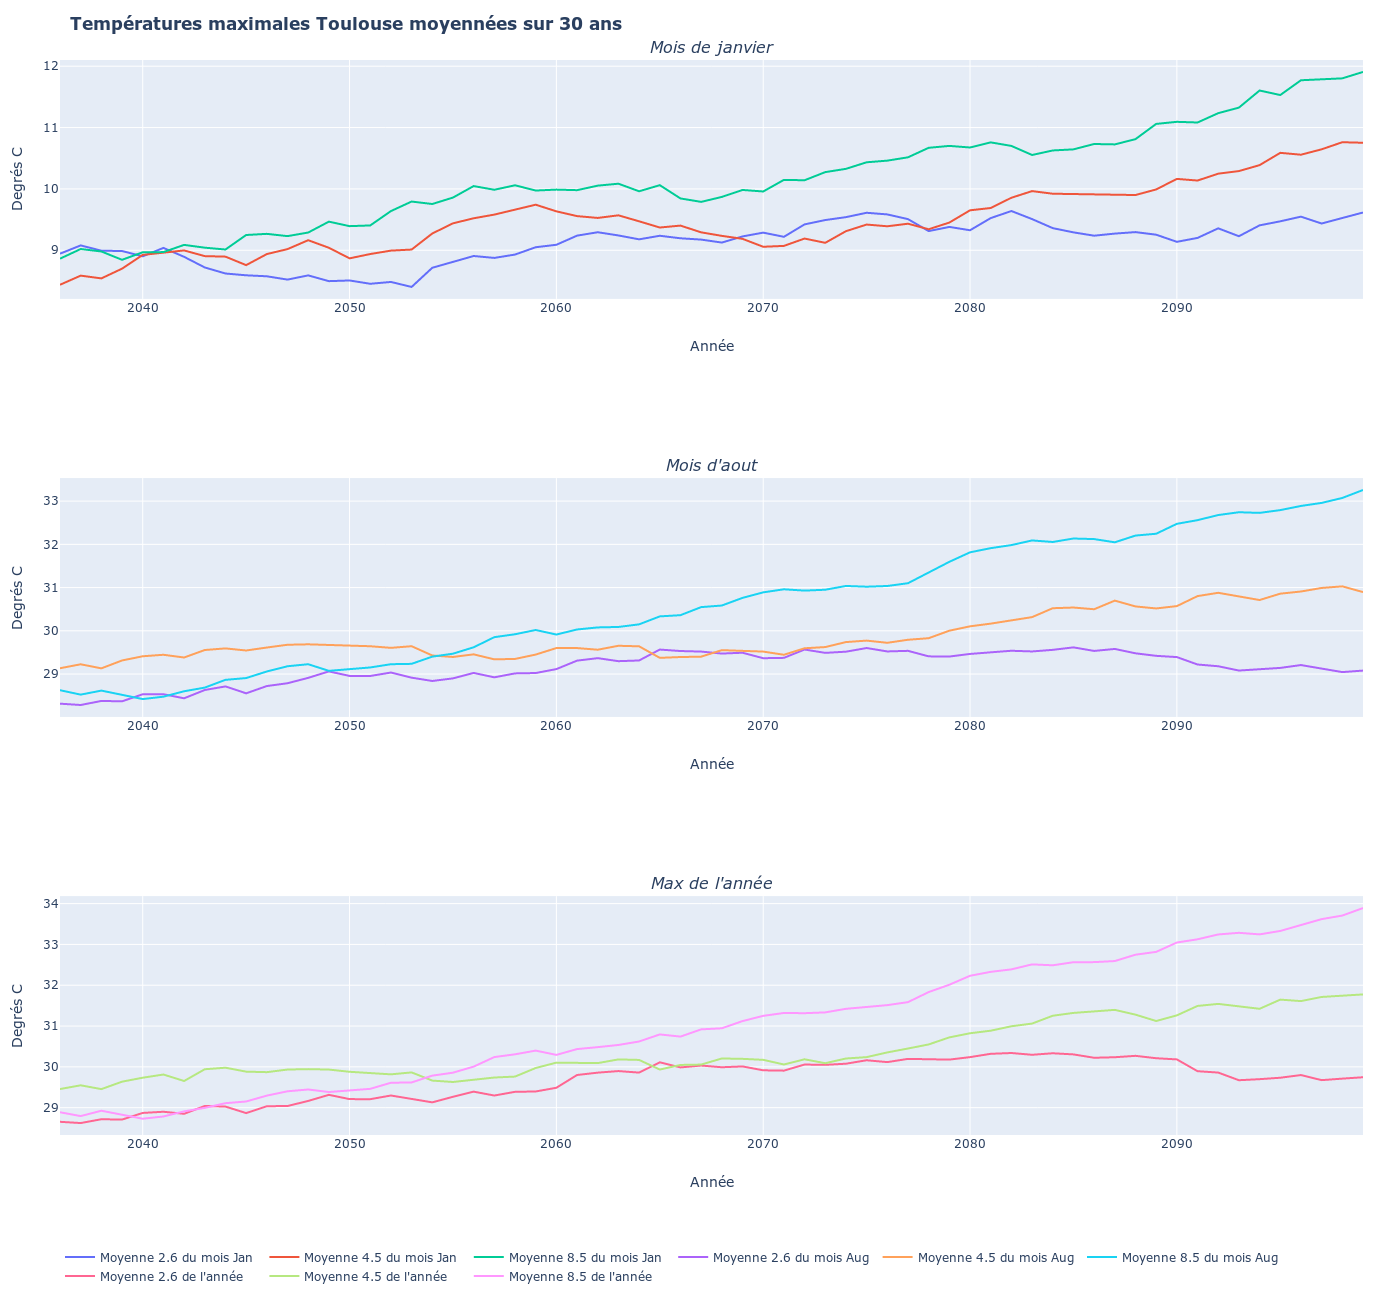

In [41]:
q = 0
trace26_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
trace45_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_45[q,:],
    name ="Moyenne 4.5 de l'année"
)

trace85_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_85[q,:],
    name ="Moyenne 8.5 de l'année"
)

fig = subplots.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("<i>Mois de janvier</i>","<i>Mois d'aout</i>","<i>Max de l'année</i>"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=3, col=1)

fig.update_yaxes(title_text="Degrés C", row=1, col=1)
fig.update_yaxes(title_text="Degrés C", row=2, col=1)
fig.update_yaxes(title_text="Degrés C", row=3, col=1)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 10, 't': 60}
fig['layout'].update(autosize = False, height=1300, width=1000, title='<b>Températures maximales Toulouse moyennées sur 30 ans</b>')

fig.update_layout(legend_orientation="h")

# py.iplot(fig, filename='basic-line')

#### Modifications et enrichissement de la figure
Les deux blocs ci-dessous permettent d'améliorer le rendu et d'annoter la figure. Le premier produit un fichier plotly qui peut être ouvert et modifié avec l'éditeur puis sauvegardé sous un nouveau nom par le second.

In [29]:
pio.write_json(fig, 'scatter1.plotly')

In [32]:
fig_styled = pio.read_json('scatter1.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

#### Diagramme Lyon
Le diagramme ci-dessous  représente l'évolution sur `yearPeriod` années de la température dans la région Lyonnaise.(Décommenter la dernière ligne du bloc pour afficher la figure)

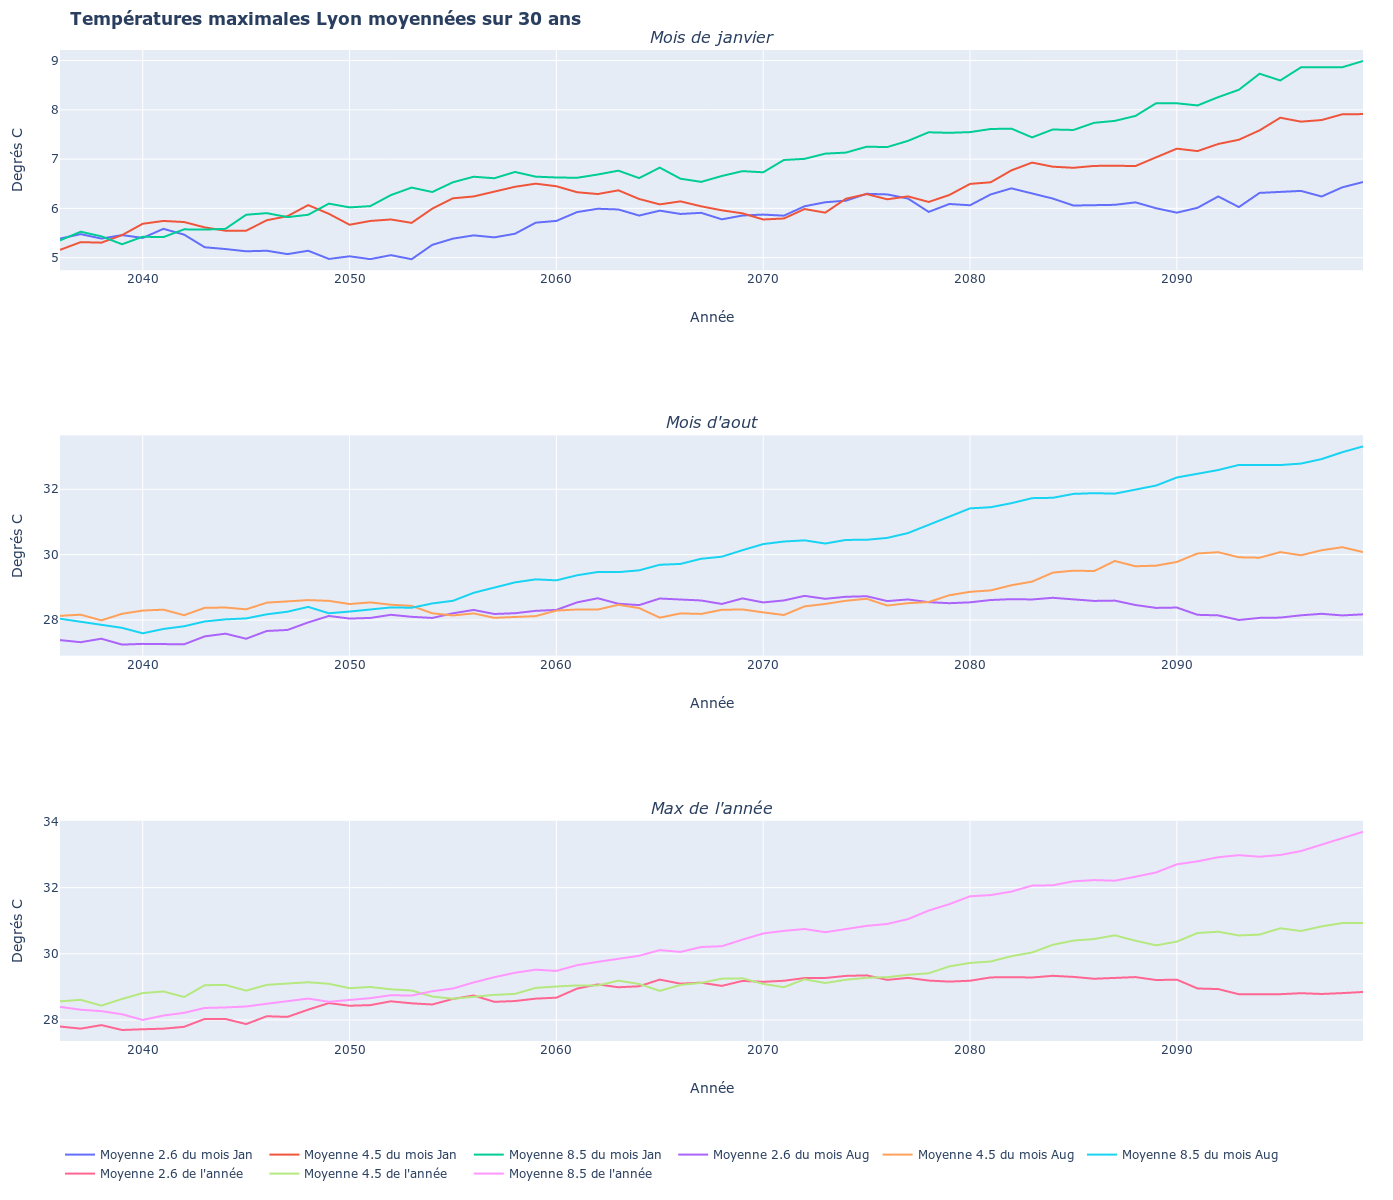

In [9]:
q = 0
trace26_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
trace45_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_45[q,:],
    name ="Moyenne 4.5 de l'année"
)

trace85_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_85[q,:],
    name ="Moyenne 8.5 de l'année"
)

fig = subplots.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("<i>Mois de janvier</i>","<i>Mois d'aout</i>","<i>Max de l'année</i>"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=3, col=1)

fig.update_yaxes(title_text="Degrés C", row=1, col=1)
fig.update_yaxes(title_text="Degrés C", row=2, col=1)
fig.update_yaxes(title_text="Degrés C", row=3, col=1)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='<b>Températures maximales Lyon moyennées sur 30 ans</b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

#### Modifications et enrichissement de la figure
Les deux blocs ci-dessous permettent d'améliorer le rendu et d'annoter la figure. Le premier produit un fichier plotly qui peut être ouvert et modifié avec l'éditeur puis sauvegardé sous un nouveau nom par le second.

In [11]:
pio.write_json(fig, 'scatter1.plotly')

In [28]:
fig_styled = pio.read_json('scatter1+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

#### Diagramme Le Chambon sur Lignon
Le diagramme ci-dessous  représente l'évolution sur `yearPeriod` années de la température dans la région Lyonnaise.(Décommenter la dernière ligne du bloc pour afficher la figure)

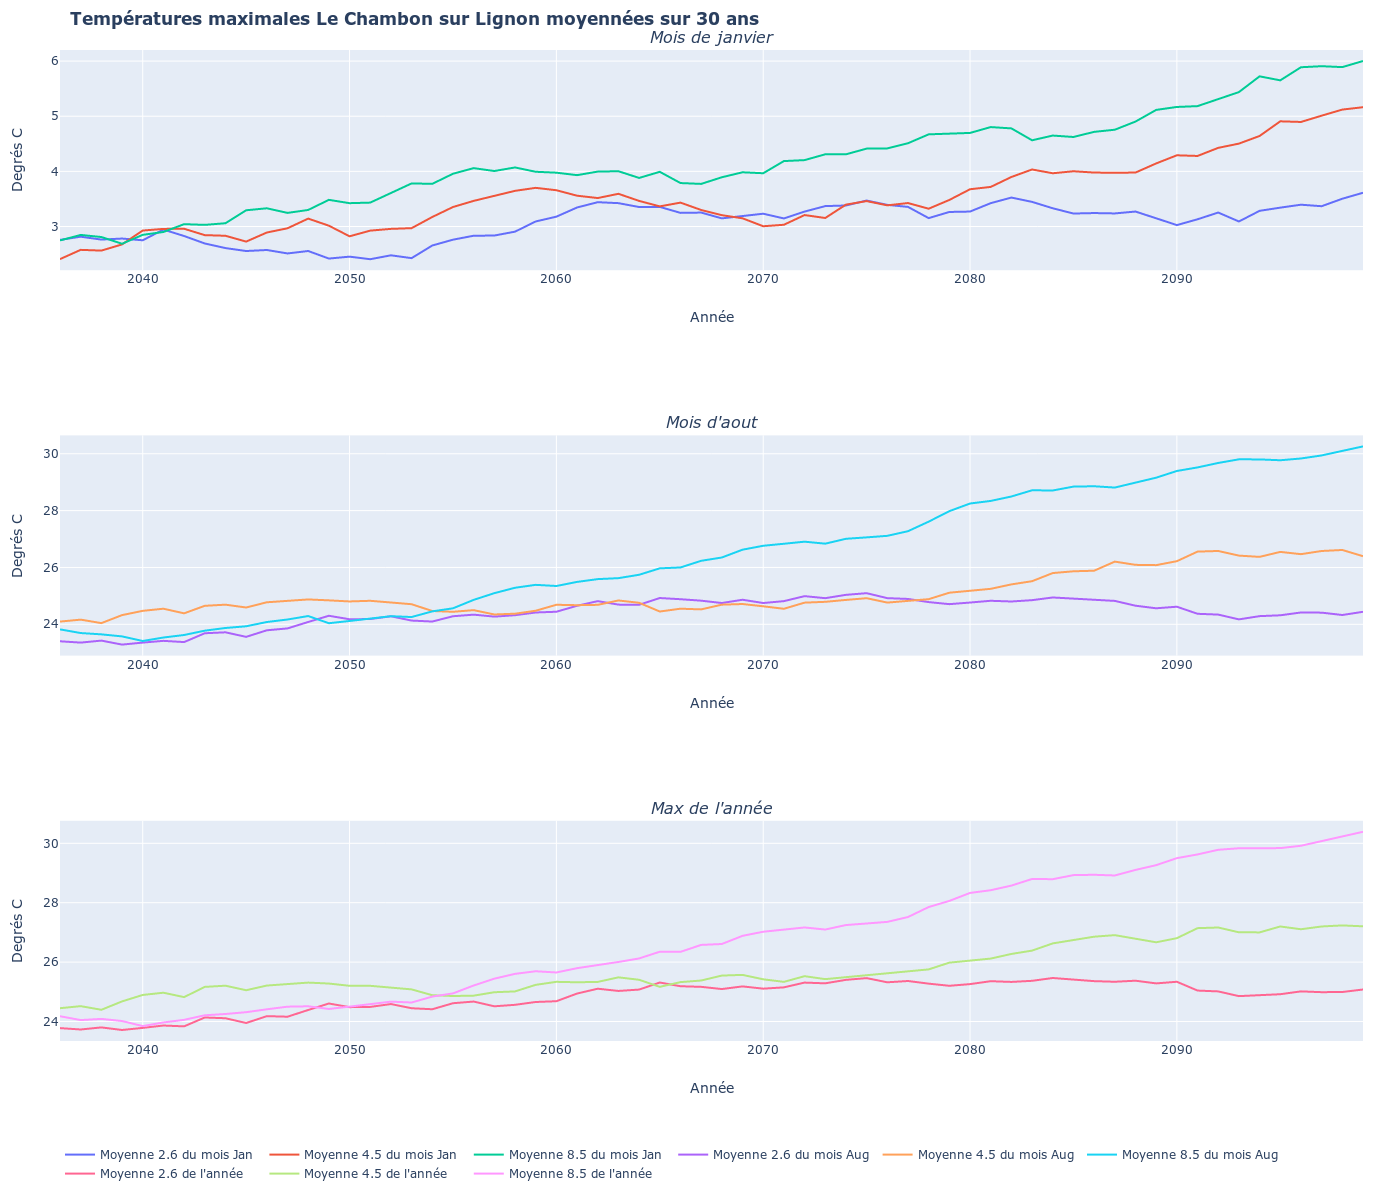

In [43]:
q = 0
trace26_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_26[q,:],
    name ='Moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_45[q,:],
    name ='Moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_85[q,:],
    name ='Moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_26[q,:],
    name ='Moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_45[q,:],
    name ='Moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_85[q,:],
    name ='Moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
trace45_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_45[q,:],
    name ="Moyenne 4.5 de l'année"
)

trace85_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_85[q,:],
    name ="Moyenne 8.5 de l'année"
)

fig = subplots.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("<i>Mois de janvier</i>","<i>Mois d'aout</i>","<i>Max de l'année</i>"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=3, col=1)

fig.update_yaxes(title_text="Degrés C", row=1, col=1)
fig.update_yaxes(title_text="Degrés C", row=2, col=1)
fig.update_yaxes(title_text="Degrés C", row=3, col=1)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='<b>Températures maximales Le Chambon sur Lignon moyennées sur 30 ans</b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

#### Comparaison entre Toulouse et Lyon

Le diagramme suivant compare les situations entre toulouse et Lyon. 

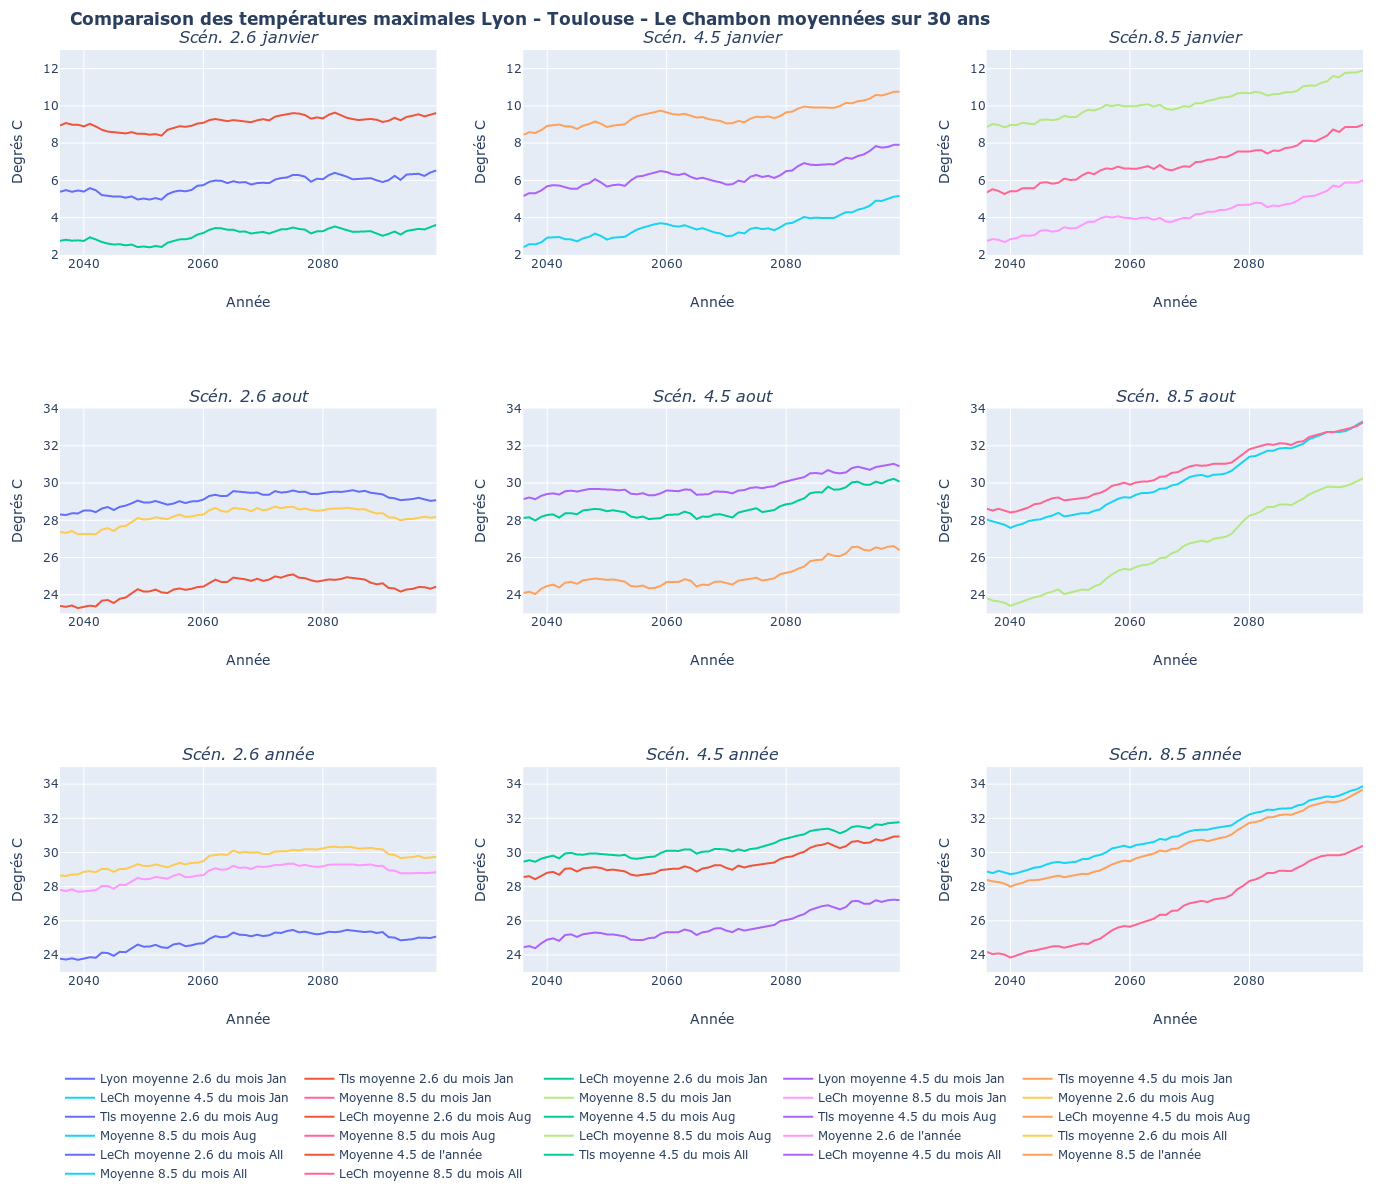

In [84]:
q = 0
traceL26_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_26[q,:],
    name ='Lyon moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT26_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_26[q,:],
    name ='Tls moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC26_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_26[q,:],
    name ='LeCh moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)


traceL45_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_45[q,:],
    name ='Lyon moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT45_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_45[q,:],
    name ='Tls moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC45_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_45[q,:],
    name ='LeCh moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)


traceL85_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT85_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC85_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_85[q,:],
    name ='LeCh moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)


q = 1
traceL26_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT26_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_26[q,:],
    name ='Tls moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC26_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_26[q,:],
    name ='LeCh moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)

traceL45_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT45_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_45[q,:],
    name ='Tls moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC45_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_45[q,:],
    name ='LeCh moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)

traceL85_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT85_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC85_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_85[q,:],
    name ='LeCh moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

q = 2
traceL26_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
traceT26_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_26[q,:],
    name ='Tls moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC26_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_26[q,:],
    name ='LeCh moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)

traceL45_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_45[q,:],
    name ="Moyenne 4.5 de l'année"
)
traceT45_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_45[q,:],
    name ='Tls moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC45_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_45[q,:],
    name ='LeCh moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)

traceL85_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Lyon_85[q,:],
    name ="Moyenne 8.5 de l'année"
)
traceT85_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC85_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_LeCh_85[q,:],
    name ='LeCh moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

fig = subplots.make_subplots(rows=3, 
                          cols=3, 
                          subplot_titles=("<i>Scén. 2.6 janvier</i>","<i>Scén. 4.5 janvier</i>","<i>Scén.8.5 janvier</i>",
                                         "<i>Scén. 2.6 aout</i>","<i>Scén. 4.5 aout</i>","<i>Scén. 8.5 aout</i>",
                                        "<i>Scén. 2.6 année</i>","<i>Scén. 4.5 année</i>","<i>Scén. 8.5 année</i>", ))

fig.append_trace(traceL26_0, 1, 1)
fig.append_trace(traceT26_0, 1, 1)
fig.append_trace(traceC26_0, 1, 1)
fig.append_trace(traceL45_0, 1, 2)
fig.append_trace(traceT45_0, 1, 2)
fig.append_trace(traceC45_0, 1, 2)
fig.append_trace(traceL85_0, 1, 3)
fig.append_trace(traceT85_0, 1, 3)
fig.append_trace(traceC85_0, 1, 3)
fig.append_trace(traceL26_1, 2, 1)
fig.append_trace(traceT26_1, 2, 1)
fig.append_trace(traceC26_1, 2, 1)
fig.append_trace(traceL45_1, 2, 2)
fig.append_trace(traceT45_1, 2, 2)
fig.append_trace(traceC45_1, 2, 2)
fig.append_trace(traceL85_1, 2, 3)
fig.append_trace(traceT85_1, 2, 3)
fig.append_trace(traceC85_1, 2, 3)
fig.append_trace(traceL26_2, 3, 1)
fig.append_trace(traceT26_2, 3, 1)
fig.append_trace(traceC26_2, 3, 1)
fig.append_trace(traceL45_2, 3, 2)
fig.append_trace(traceT45_2, 3, 2)
fig.append_trace(traceC45_2, 3, 2)
fig.append_trace(traceL85_2, 3, 3)
fig.append_trace(traceT85_2, 3, 3)
fig.append_trace(traceC85_2, 3, 3)

fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=1, col=2)
fig.update_xaxes(title_text="Année", row=1, col=3)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=2, col=2)
fig.update_xaxes(title_text="Année", row=2, col=3)
fig.update_xaxes(title_text="Année", row=3, col=1)
fig.update_xaxes(title_text="Année", row=3, col=2)
fig.update_xaxes(title_text="Année", row=3, col=3)

fig.update_yaxes(title_text="Degrés C", range=[2, 13], row=1, col=1)
fig.update_yaxes(title_text="Degrés C", range=[2, 13], row=1, col=2)
fig.update_yaxes(title_text="Degrés C", range=[2, 13], row=1, col=3)
fig.update_yaxes(title_text="Degrés C", range=[23, 34], row=2, col=1)
fig.update_yaxes(title_text="Degrés C", range=[23, 34], row=2, col=2)
fig.update_yaxes(title_text="Degrés C", range=[23, 34], row=2, col=3)
fig.update_yaxes(title_text="Degrés C", range=[23, 35], row=3, col=1)
fig.update_yaxes(title_text="Degrés C", range=[23, 35], row=3, col=2)
fig.update_yaxes(title_text="Degrés C", range=[23, 35], row=3, col=3)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=1000, title='<b>Comparaison des températures maximales Lyon - Toulouse - Le Chambon moyennées sur 30 ans<b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

#### Modifications et enrichissement de la figure
Les deux blocs ci-dessous permettent d'améliorer le rendu et d'annoter la figure. Le premier produit un fichier plotly qui peut être ouvert et modifié avec l'éditeur puis sauvegardé sous un nouveau nom par le second.

In [11]:
pio.write_json(fig, 'scatter1.plotly')

In [28]:
fig_styled = pio.read_json('scatter1+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

### Calcul de la moyenne des minima sur l'intervalle choisi (30ans) pour les années disponibles (Toulouse et Lyon)

Calcul de la moyenne des températures mensuelles/annuelles sur `yearInterval` (30 ans) pendant une période de `yearPeriod` (64 années) successives pour une sélection de `calcMonth`  mois (Janvier, Aout, année).

In [49]:
# Variables for the computation
# Séquence d'années pendant lesquelles les calculs sont effectués
#     * Choix de l'année de départ : yearBegin
#     * Choix du nombre d'années sur lesquelles est effectuée la moyenne glissante : yearInterval
#     * Choix de l'intervalle de calcul yearPeriod
#     * Choix des mois choisis pour le calcul 0 = Jan; 7 = Aout ...
# yearbegin + yearperiod must be <= 2101
driasOrigin = 2006
driasEnd = 2100
nbYears = driasEnd - driasOrigin + 1
# ===================== Choice of parameters below =======================================
yearBegin = 2006
yearInterval = 30 # 30 years to compute the average
yearPeriod = 64 #  64 years  from 2036 to 2100
calcMonth = [0, 7, 12]  # Calcul effectué pour Janvier (0) Aout (7) et moyenne annuelle (12)
lencalcMonths = len(calcMonth)
#  Grille i j
# sous espace de la grille 10X10 utilisé
#  le premier écantillon est un carré 3X3 au centre de la grille
# Le second échantillon est toute la grille entière
starti = 6
intervali = 3
startj = 6
intervalj = 3  # Calcul sur un carré de 16km de côté au centre de la carte (ville de Lyon)
# ====================== ENd of Choice ====================================================
#starti = 0
#intervali = 10
#startj = 0
#intervalj = 10
# Variables de calcul
startYear = yearBegin - driasOrigin
endYear = startYear + yearPeriod
#print(yearPeriodInterval)
endi = starti + intervali
endj = startj + intervalj
                          
if not ((startYear >= 0) and (yearBegin + yearPeriod + yearInterval) <= driasEnd):
    print('starting year or finishing year out of bounds')
    sys.exit('giving up on year bounds')
#print(gridj[loc_j])
#print(gridi[loc_i])
#print(startYear,':',endYear,',',calcMonth,',',startj,':',endj,',',starti,':',endi)
#print(temp.shape)
#print(np.mean(temp[startYear:endYear,calcMonth,startj:endj,starti:endi]))


**Les paramètres ci dessous sont valides pour Toulouse et Lyon**

In [50]:
# Using online file takes a little more time
# Calculate the number of years yielding a result
# Toulouse
moymAreaInterval_Tlse_26 = np.zeros((lencalcMonths, nbYears))
moymAreaInterval_Tlse_45 = np.zeros((lencalcMonths, nbYears))
moymAreaInterval_Tlse_85 = np.zeros((lencalcMonths, nbYears))
# Tmin, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moymAreaInterval_Tlse_26[:,p] = np.mean(Tlse_tmin26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moymAreaInterval_Tlse_45[:,p] = np.mean(Tlse_tmin45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moymAreaInterval_Tlse_85[:,p] = np.mean(Tlse_tmin85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
# Lyon
moymAreaInterval_Lyon_26 = np.zeros((lencalcMonths, nbYears))
moymAreaInterval_Lyon_45 = np.zeros((lencalcMonths, nbYears))
moymAreaInterval_Lyon_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moymAreaInterval_Lyon_26[:, p] = np.mean(Lyon_tmin26[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moymAreaInterval_Lyon_45[:, p] = np.mean(Lyon_tmin45[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moymAreaInterval_Lyon_85[:, p] = np.mean(Lyon_tmin85[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))

firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriod
#data = [] #* lencalcMonths
#trace = [] #* lencalcMonths# Using online file takes a little more time

**Les paramètres ci dessous sont valides pour Le Chambon sur Lignon**

In [51]:
# Variables for the computation
# Séquence d'années pendant lesquelles les calculs sont effectués
#     * Choix de l'année de départ : yearBegin
#     * Choix du nombre d'années sur lesquelles est effectuée la moyenne glissante : yearInterval
#     * Choix de l'intervalle de calcul yearPeriod
#     * Choix des mois choisis pour le calcul 0 = Jan; 7 = Aout ...
# yearbegin + yearperiod must be <= 2101
driasOrigin = 2006
driasEnd = 2100
nbYears = driasEnd - driasOrigin + 1
# ===================== Choice of parameters below =======================================
yearBegin = 2006
yearInterval = 30 # 30 years to compute the average
yearPeriod = 64 #  64 years  from 2036 to 2100
calcMonth = [0, 7, 12]  # Calcul effectué pour Janvier (0) Aout (7) et moyenne annuelle (12)
lencalcMonths = len(calcMonth)
#  Grille i j
# sous espace de la grille 10X10 utilisé
#  le premier écantillon est un carré 3X3 au centre de la grille
# Le second échantillon est toute la grille entière
starti = 0
intervali = 1
startj = 0
intervalj = 1  # Calcul sur un carré de 16km de côté au centre de la carte (ville de Lyon)
# ====================== ENd of Choice ====================================================
#starti = 0
#intervali = 10
#startj = 0
#intervalj = 10
# Variables de calcul
startYear = yearBegin - driasOrigin
endYear = startYear + yearPeriod
#print(yearPeriodInterval)
endi = starti + intervali
endj = startj + intervalj
                          
if not ((startYear >= 0) and (yearBegin + yearPeriod + yearInterval) <= driasEnd):
    print('starting year or finishing year out of bounds')
    sys.exit('giving up on year bounds')
#print(gridj[loc_j])
#print(gridi[loc_i])
#print(startYear,':',endYear,',',calcMonth,',',startj,':',endj,',',starti,':',endi)
#print(temp.shape)
#print(np.mean(temp[startYear:endYear,calcMonth,startj:endj,starti:endi]))

### Calcul de la moyenne des maxima sur l'intervalle choisi (30ans) pour les années disponibles (Le Chambon sur Lignon)

Calcul de la moyenne des températures mensuelles/annuelles sur `yearInterval` (30 ans) pendant une période de `yearPeriod` (64 années) successives pour une sélection de `calcMonth`  mois (Janvier, Aout, année).

In [52]:
# Using online file takes a little more time
# Calculate the number of years yielding a result
# Toulouse
moymAreaInterval_LeCh_26 = np.zeros((lencalcMonths, nbYears))
moymAreaInterval_LeCh_45 = np.zeros((lencalcMonths, nbYears))
moymAreaInterval_LeCh_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moymAreaInterval_LeCh_26[:, p] = np.mean(LeCh_tmin26[a:b, calcMonth, startj, starti], axis=(0))
    moymAreaInterval_LeCh_45[:, p] = np.mean(LeCh_tmin45[a:b, calcMonth, startj, starti], axis=(0))
    moymAreaInterval_LeCh_85[:, p] = np.mean(LeCh_tmin85[a:b, calcMonth, startj, starti], axis=(0))

firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriod
data = [] #* lencalcMonths
trace = [] #* lencalcMonths

Le diagramme ci-dessous  représente l'évolution sur `yearPeriod` années de la température dans la région Lyonnaise.(Décommenter la dernière ligne du bloc pour afficher la figure)

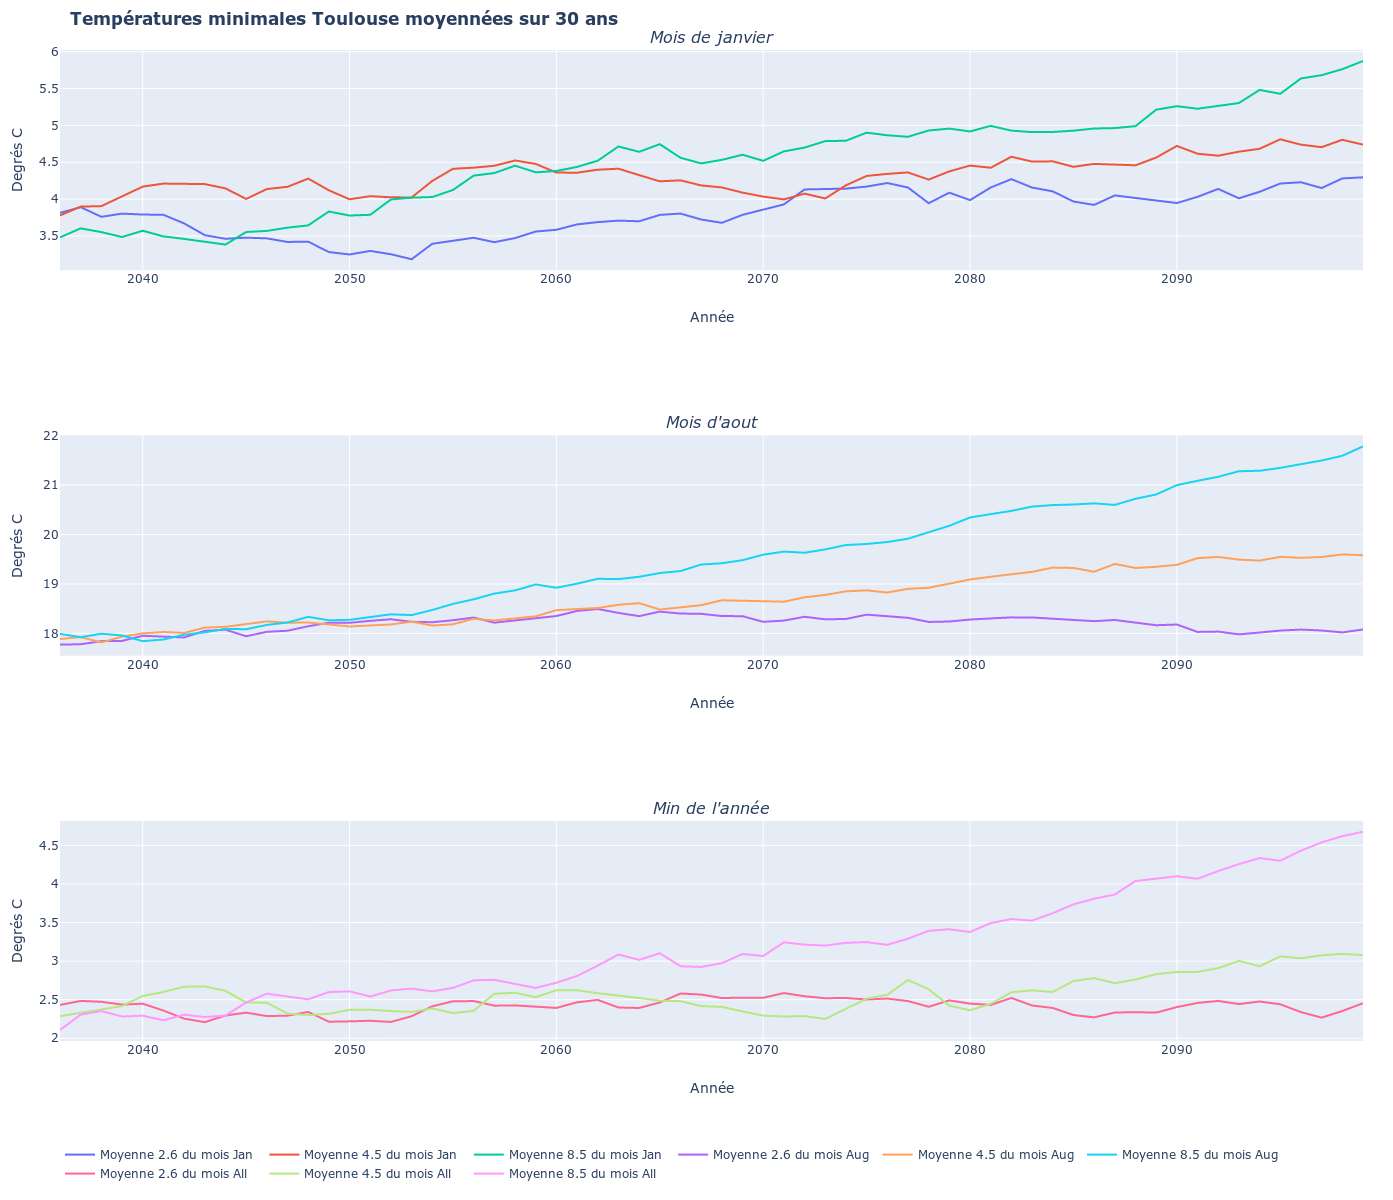

In [55]:
q = 0
trace26_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
trace45_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)

trace85_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)

fig = subplots.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("<i>Mois de janvier</i>","<i>Mois d'aout</i>","<i>Min de l'année</i>"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)


fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=3, col=1)

fig.update_yaxes(title_text="Degrés C", row=1, col=1)
fig.update_yaxes(title_text="Degrés C", row=2, col=1)
fig.update_yaxes(title_text="Degrés C", row=3, col=1)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='<b>Températures minimales Toulouse moyennées sur 30 ans</b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

#### Modifications et enrichissement de la figure

In [15]:
pio.write_json(fig, 'scatter2.plotly')

In [27]:
fig_styled = pio.read_json('scatter2+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

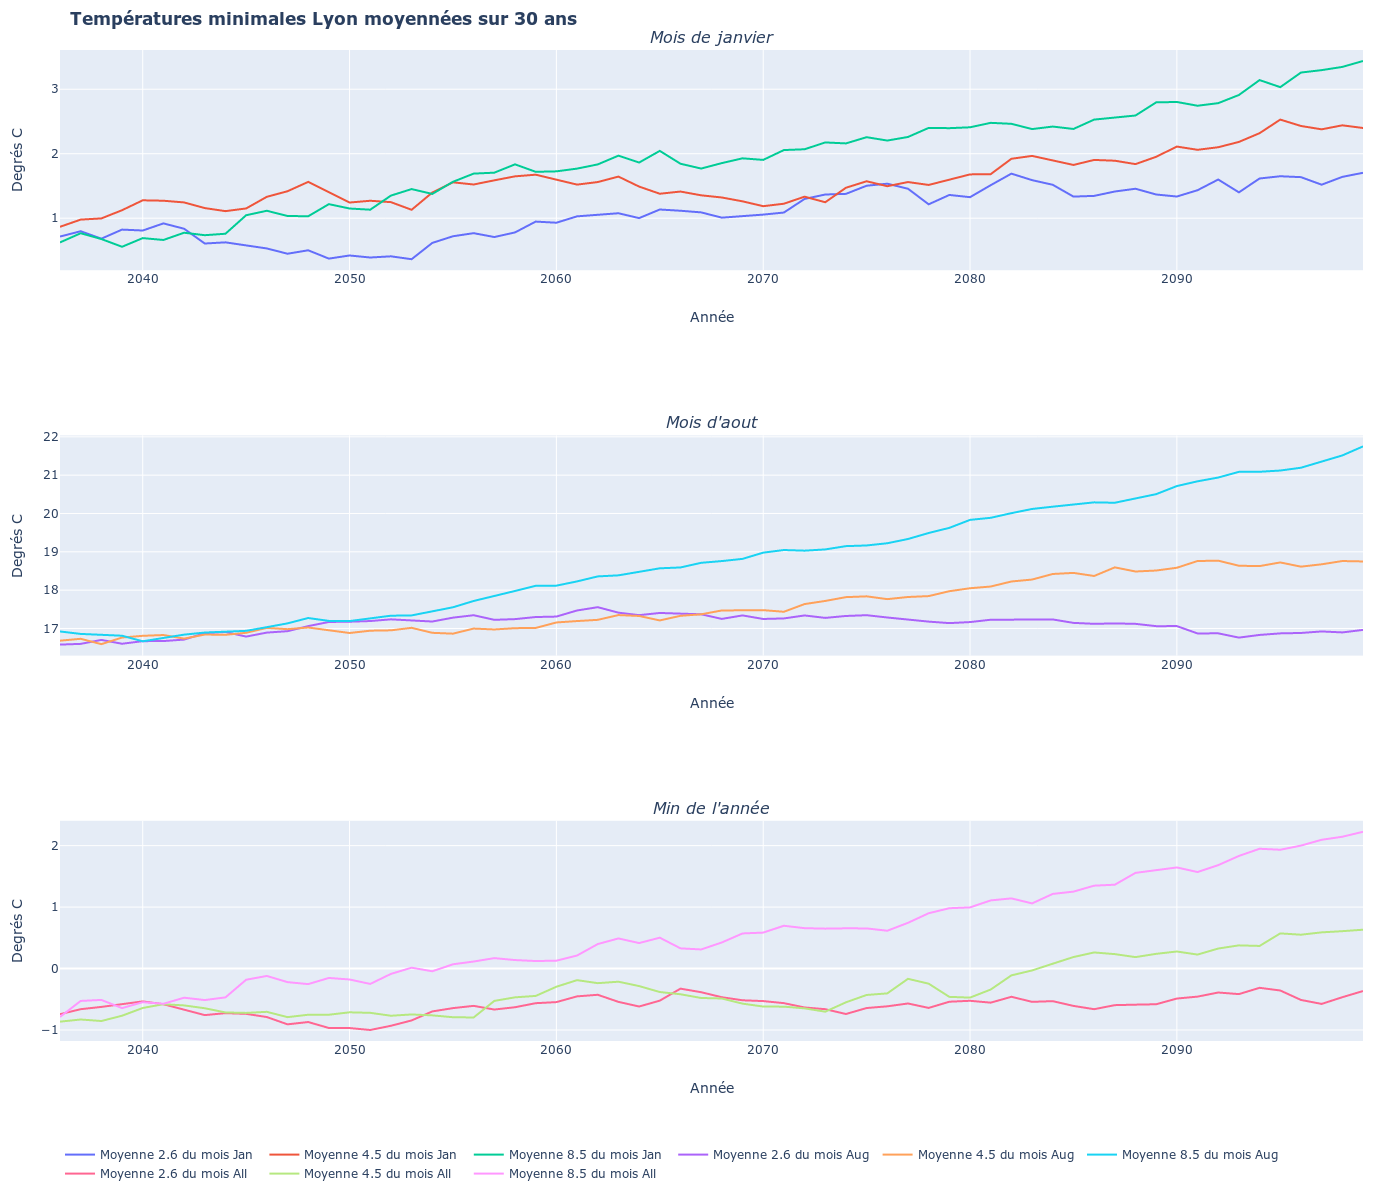

In [56]:
q = 0
trace26_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
trace45_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)

trace85_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)

fig = subplots.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("<i>Mois de janvier</i>","<i>Mois d'aout</i>","<i>Min de l'année</i>"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)


fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=3, col=1)

fig.update_yaxes(title_text="Degrés C", row=1, col=1)
fig.update_yaxes(title_text="Degrés C", row=2, col=1)
fig.update_yaxes(title_text="Degrés C", row=3, col=1)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='<b>Températures minimales Lyon moyennées sur 30 ans</b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

In [27]:
fig_styled = pio.read_json('scatter2+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

In [15]:
pio.write_json(fig, 'scatter2.plotly')

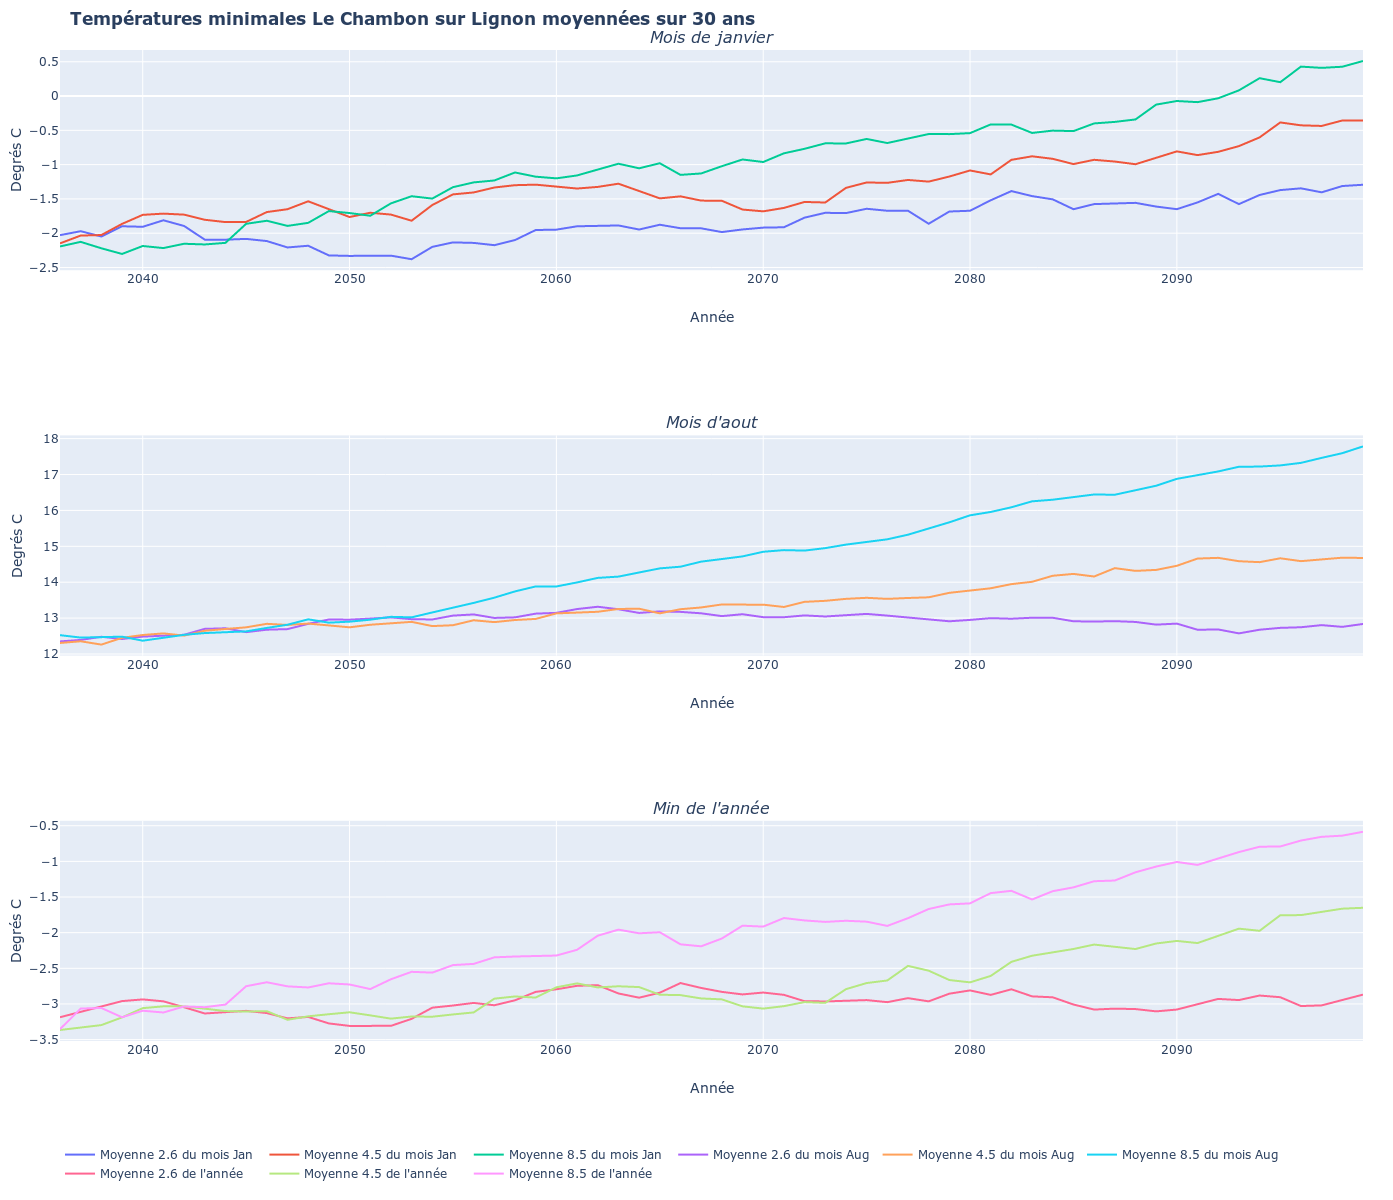

In [58]:
q = 0
trace26_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_26[q,:],
    name ='Moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_45[q,:],
    name ='Moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_85[q,:],
    name ='Moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_26[q,:],
    name ='Moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_45[q,:],
    name ='Moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_85[q,:],
    name ='Moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
trace45_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_45[q,:],
    name ="Moyenne 4.5 de l'année"
)

trace85_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_85[q,:],
    name ="Moyenne 8.5 de l'année"
)

fig = subplots.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("<i>Mois de janvier</i>","<i>Mois d'aout</i>","<i>Min de l'année</i>"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=3, col=1)

fig.update_yaxes(title_text="Degrés C", row=1, col=1)
fig.update_yaxes(title_text="Degrés C", row=2, col=1)
fig.update_yaxes(title_text="Degrés C", row=3, col=1)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='<b>Températures minimales Le Chambon sur Lignon moyennées sur 30 ans</b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

In [15]:
pio.write_json(fig, 'scatter2.plotly')

In [27]:
fig_styled = pio.read_json('scatter2+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

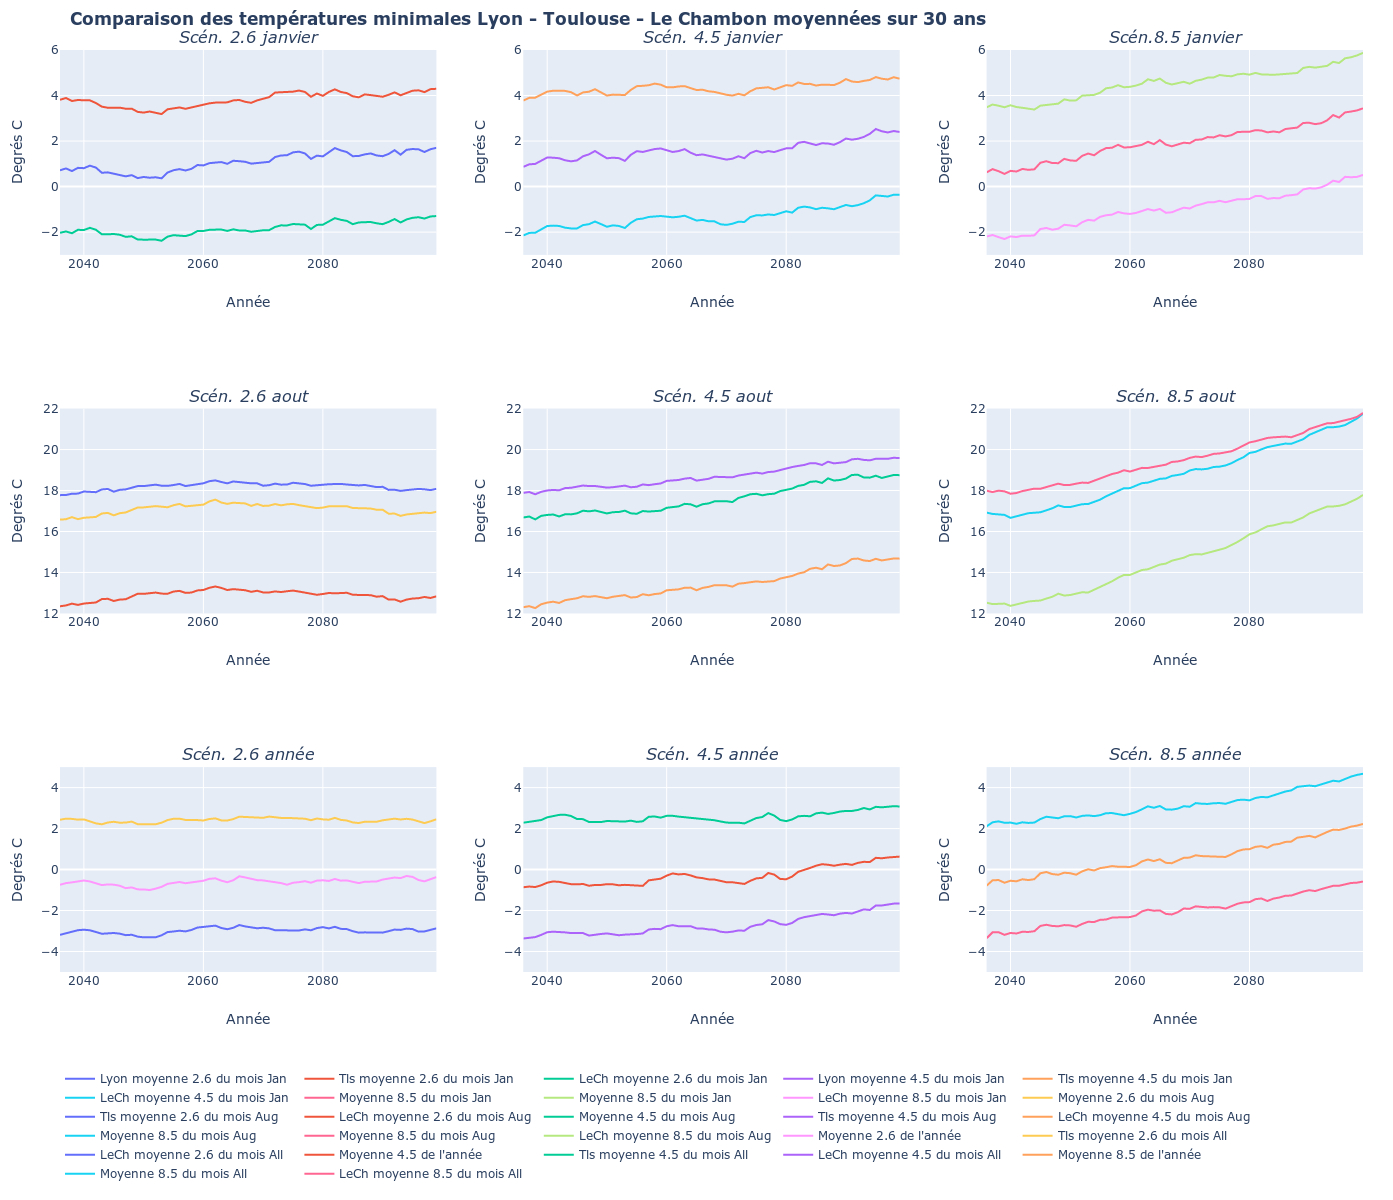

In [91]:
q = 0
traceL26_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_26[q,:],
    name ='Lyon moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT26_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_26[q,:],
    name ='Tls moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC26_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_26[q,:],
    name ='LeCh moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)


traceL45_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_45[q,:],
    name ='Lyon moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT45_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_45[q,:],
    name ='Tls moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC45_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_45[q,:],
    name ='LeCh moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)


traceL85_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT85_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC85_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_85[q,:],
    name ='LeCh moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)


q = 1
traceL26_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT26_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_26[q,:],
    name ='Tls moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC26_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_26[q,:],
    name ='LeCh moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)

traceL45_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT45_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_45[q,:],
    name ='Tls moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC45_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_45[q,:],
    name ='LeCh moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)

traceL85_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)
traceT85_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC85_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_85[q,:],
    name ='LeCh moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

q = 2
traceL26_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
traceT26_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_26[q,:],
    name ='Tls moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC26_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_26[q,:],
    name ='LeCh moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)

traceL45_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_45[q,:],
    name ="Moyenne 4.5 de l'année"
)
traceT45_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_45[q,:],
    name ='Tls moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC45_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_45[q,:],
    name ='LeCh moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)

traceL85_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Lyon_85[q,:],
    name ="Moyenne 8.5 de l'année"
)
traceT85_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)
traceC85_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_LeCh_85[q,:],
    name ='LeCh moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

fig = subplots.make_subplots(rows=3, 
                          cols=3, 
                          subplot_titles=("<i>Scén. 2.6 janvier</i>","<i>Scén. 4.5 janvier</i>","<i>Scén.8.5 janvier</i>",
                                         "<i>Scén. 2.6 aout</i>","<i>Scén. 4.5 aout</i>","<i>Scén. 8.5 aout</i>",
                                        "<i>Scén. 2.6 année</i>","<i>Scén. 4.5 année</i>","<i>Scén. 8.5 année</i>", ))

fig.append_trace(traceL26_0, 1, 1)
fig.append_trace(traceT26_0, 1, 1)
fig.append_trace(traceC26_0, 1, 1)
fig.append_trace(traceL45_0, 1, 2)
fig.append_trace(traceT45_0, 1, 2)
fig.append_trace(traceC45_0, 1, 2)
fig.append_trace(traceL85_0, 1, 3)
fig.append_trace(traceT85_0, 1, 3)
fig.append_trace(traceC85_0, 1, 3)
fig.append_trace(traceL26_1, 2, 1)
fig.append_trace(traceT26_1, 2, 1)
fig.append_trace(traceC26_1, 2, 1)
fig.append_trace(traceL45_1, 2, 2)
fig.append_trace(traceT45_1, 2, 2)
fig.append_trace(traceC45_1, 2, 2)
fig.append_trace(traceL85_1, 2, 3)
fig.append_trace(traceT85_1, 2, 3)
fig.append_trace(traceC85_1, 2, 3)
fig.append_trace(traceL26_2, 3, 1)
fig.append_trace(traceT26_2, 3, 1)
fig.append_trace(traceC26_2, 3, 1)
fig.append_trace(traceL45_2, 3, 2)
fig.append_trace(traceT45_2, 3, 2)
fig.append_trace(traceC45_2, 3, 2)
fig.append_trace(traceL85_2, 3, 3)
fig.append_trace(traceT85_2, 3, 3)
fig.append_trace(traceC85_2, 3, 3)

fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=1, col=2)
fig.update_xaxes(title_text="Année", row=1, col=3)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=2, col=2)
fig.update_xaxes(title_text="Année", row=2, col=3)
fig.update_xaxes(title_text="Année", row=3, col=1)
fig.update_xaxes(title_text="Année", row=3, col=2)
fig.update_xaxes(title_text="Année", row=3, col=3)

fig.update_yaxes(title_text="Degrés C", range=[-3, 6], row=1, col=1)
fig.update_yaxes(title_text="Degrés C", range=[-3, 6], row=1, col=2)
fig.update_yaxes(title_text="Degrés C", range=[-3, 6], row=1, col=3)
fig.update_yaxes(title_text="Degrés C", range=[12, 22], row=2, col=1)
fig.update_yaxes(title_text="Degrés C", range=[12, 22], row=2, col=2)
fig.update_yaxes(title_text="Degrés C", range=[12, 22], row=2, col=3)
fig.update_yaxes(title_text="Degrés C", range=[-5, 5], row=3, col=1)
fig.update_yaxes(title_text="Degrés C", range=[-5, 5], row=3, col=2)
fig.update_yaxes(title_text="Degrés C", range=[-5, 5], row=3, col=3)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=1000, title='<b>Comparaison des températures minimales Lyon - Toulouse - Le Chambon moyennées sur 30 ans<b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

In [60]:
# Variables for the computation
# Séquence d'années pendant lesquelles les calculs sont effectués
#     * Choix de l'année de départ : yearBegin
#     * Choix du nombre d'années sur lesquelles est effectuée la moyenne glissante : yearInterval
#     * Choix de l'intervalle de calcul yearPeriod
#     * Choix des mois choisis pour le calcul 0 = Jan; 7 = Aout ...
# yearbegin + yearperiod must be <= 2101
driasOrigin = 2006
driasEnd = 2100
nbYears = driasEnd - driasOrigin + 1
# ===================== Choice of parameters below =======================================
yearBegin = 2006
yearInterval = 30 # 30 years to compute the average
yearPeriod = 64 #  64 years  from 2036 to 2100
calcMonth = [0, 7, 12]  # Calcul effectué pour Janvier (0) Aout (7) et moyenne annuelle (12)
lencalcMonths = len(calcMonth)
#  Grille i j
# sous espace de la grille 10X10 utilisé
#  le premier écantillon est un carré 3X3 au centre de la grille
# Le second échantillon est toute la grille entière
starti = 6
intervali = 3
startj = 6
intervalj = 3  # Calcul sur un carré de 16km de côté au centre de la carte (ville de Lyon)
# ====================== ENd of Choice ====================================================
#starti = 0
#intervali = 10
#startj = 0
#intervalj = 10
# Variables de calcul
startYear = yearBegin - driasOrigin
endYear = startYear + yearPeriod
#print(yearPeriodInterval)
endi = starti + intervali
endj = startj + intervalj
                          
if not ((startYear >= 0) and (yearBegin + yearPeriod + yearInterval) <= driasEnd):
    print('starting year or finishing year out of bounds')
    sys.exit('giving up on year bounds')
#print(gridj[loc_j])
#print(gridi[loc_i])
#print(startYear,':',endYear,',',calcMonth,',',startj,':',endj,',',starti,':',endi)
#print(temp.shape)
#print(np.mean(temp[startYear:endYear,calcMonth,startj:endj,starti:endi]))

In [61]:
# Using online file takes a little more time
# Calculate the number of years yielding a result
#Toulouse
moyDAreaInterval_Tlse_26 = np.zeros((lencalcMonths, nbYears))
moyDAreaInterval_Tlse_45 = np.zeros((lencalcMonths, nbYears))
moyDAreaInterval_Tlse_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moyDAreaInterval_Tlse_26[:,p] = np.mean(Tlse_delta26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moyDAreaInterval_Tlse_45[:,p] = np.mean(Tlse_delta45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moyDAreaInterval_Tlse_85[:,p] = np.mean(Tlse_delta85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
#Lyon
moyDAreaInterval_Lyon_26 = np.zeros((lencalcMonths, nbYears))
moyDAreaInterval_Lyon_45 = np.zeros((lencalcMonths, nbYears))
moyDAreaInterval_Lyon_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moyDAreaInterval_Lyon_26[:,p] = np.mean(Lyon_delta26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moyDAreaInterval_Lyon_45[:,p] = np.mean(Lyon_delta45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moyDAreaInterval_Lyon_85[:,p] = np.mean(Lyon_delta85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriod
#data = [] #* lencalcMonths
#trace = [] #* lencalcMonths# Using online file takes a little more time

In [62]:
# Variables for the computation
# Séquence d'années pendant lesquelles les calculs sont effectués
#     * Choix de l'année de départ : yearBegin
#     * Choix du nombre d'années sur lesquelles est effectuée la moyenne glissante : yearInterval
#     * Choix de l'intervalle de calcul yearPeriod
#     * Choix des mois choisis pour le calcul 0 = Jan; 7 = Aout ...
# yearbegin + yearperiod must be <= 2101
driasOrigin = 2006
driasEnd = 2100
nbYears = driasEnd - driasOrigin + 1
# ===================== Choice of parameters below =======================================
yearBegin = 2006
yearInterval = 30 # 30 years to compute the average
yearPeriod = 64 #  64 years  from 2036 to 2100
calcMonth = [0, 7, 12]  # Calcul effectué pour Janvier (0) Aout (7) et moyenne annuelle (12)
lencalcMonths = len(calcMonth)
#  Grille i j
# sous espace de la grille 10X10 utilisé
#  le premier écantillon est un carré 3X3 au centre de la grille
# Le second échantillon est toute la grille entière
starti = 0
intervali = 1
startj = 0
intervalj = 1  # Calcul sur un carré de 16km de côté au centre de la carte (ville de Lyon)
# ====================== ENd of Choice ====================================================
#starti = 0
#intervali = 10
#startj = 0
#intervalj = 10
# Variables de calcul
startYear = yearBegin - driasOrigin
endYear = startYear + yearPeriod
#print(yearPeriodInterval)
endi = starti + intervali
endj = startj + intervalj
                          
if not ((startYear >= 0) and (yearBegin + yearPeriod + yearInterval) <= driasEnd):
    print('starting year or finishing year out of bounds')
    sys.exit('giving up on year bounds')
#print(gridj[loc_j])
#print(gridi[loc_i])
#print(startYear,':',endYear,',',calcMonth,',',startj,':',endj,',',starti,':',endi)
#print(temp.shape)
#print(np.mean(temp[startYear:endYear,calcMonth,startj:endj,starti:endi]))

In [63]:
# Using online file takes a little more time
# Calculate the number of years yielding a result
# Toulouse
moyDAreaInterval_LeCh_26 = np.zeros((lencalcMonths, nbYears))
moyDAreaInterval_LeCh_45 = np.zeros((lencalcMonths, nbYears))
moyDAreaInterval_LeCh_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moyDAreaInterval_LeCh_26[:, p] = np.mean(LeCh_delta26[a:b, calcMonth, startj, starti], axis=(0))
    moyDAreaInterval_LeCh_45[:, p] = np.mean(LeCh_delta45[a:b, calcMonth, startj, starti], axis=(0))
    moyDAreaInterval_LeCh_85[:, p] = np.mean(LeCh_delta85[a:b, calcMonth, startj, starti], axis=(0))

firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriod
data = [] #* lencalcMonths
trace = [] #* lencalcMonths

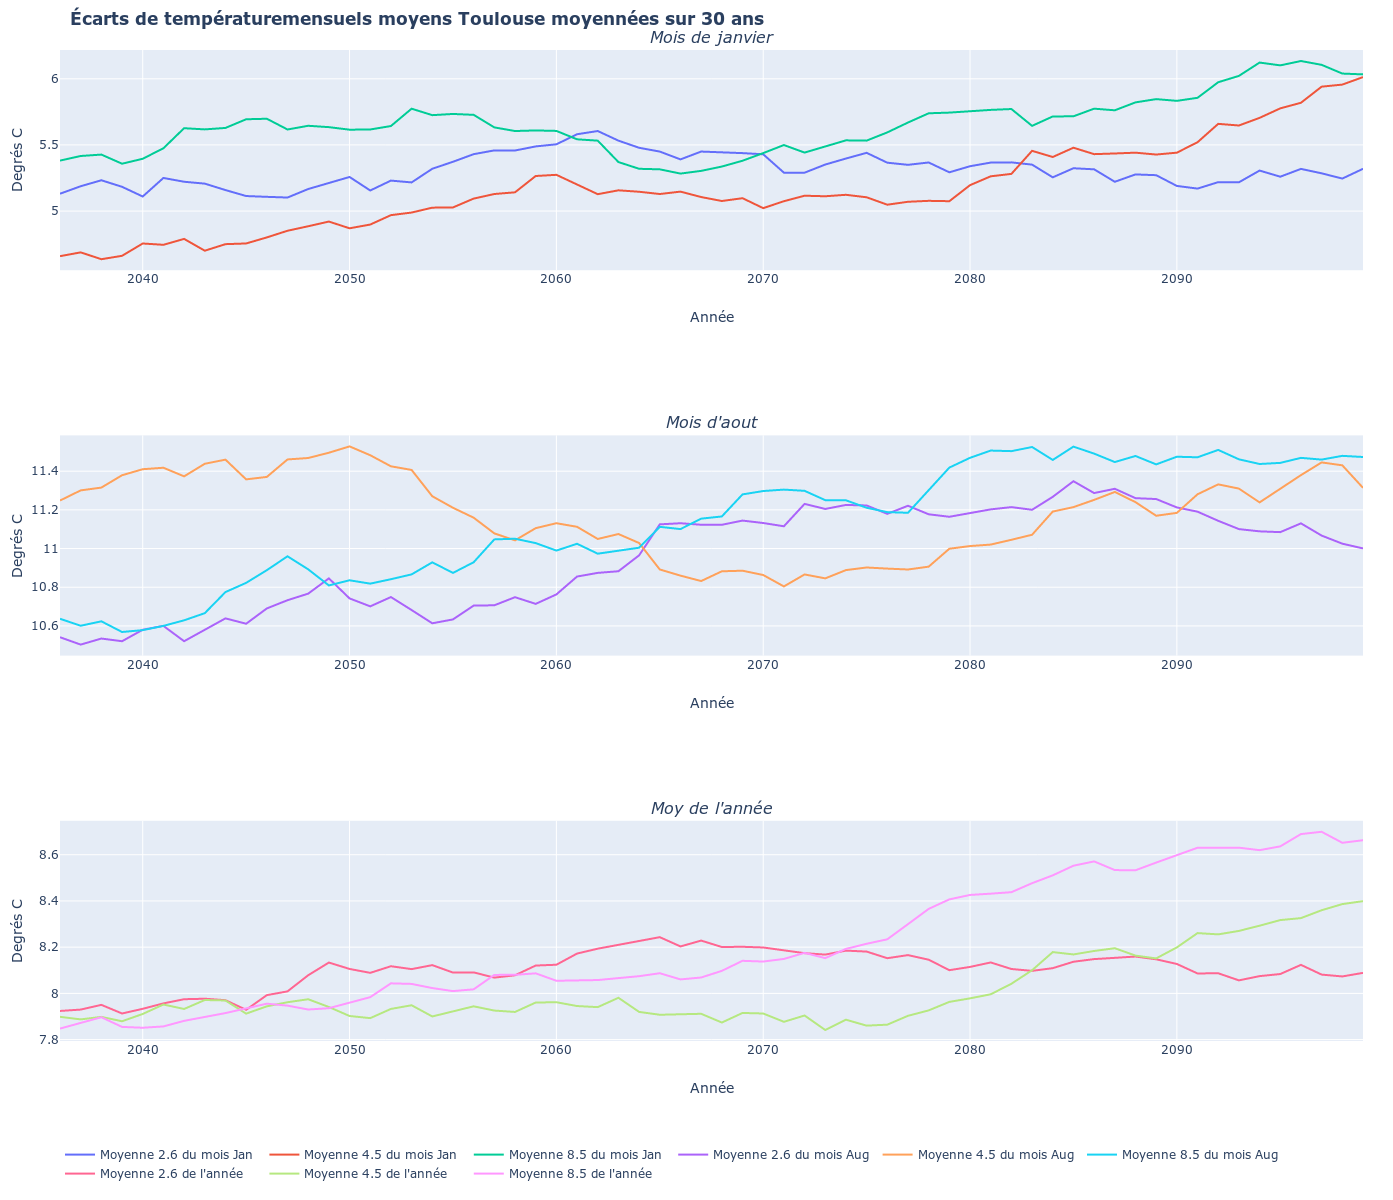

In [70]:
q = 0
trace26_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Tlse_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Tlse_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Tlse_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Tlse_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Tlse_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Tlse_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
trace45_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Tlse_45[q,:],
    name ="Moyenne 4.5 de l'année"
)

trace85_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Tlse_85[q,:],
    name ="Moyenne 8.5 de l'année"
)

fig = subplots.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("<i>Mois de janvier</i>","<i>Mois d'aout</i>","<i>Moy de l'année</i>"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=3, col=1)

fig.update_yaxes(title_text="Degrés C", row=1, col=1)
fig.update_yaxes(title_text="Degrés C", row=2, col=1)
fig.update_yaxes(title_text="Degrés C", row=3, col=1)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='<b>Écarts de températuremensuels moyens Toulouse moyennées sur 30 ans</b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

In [15]:
pio.write_json(fig, 'scatter2.plotly')

In [27]:
fig_styled = pio.read_json('scatter2+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

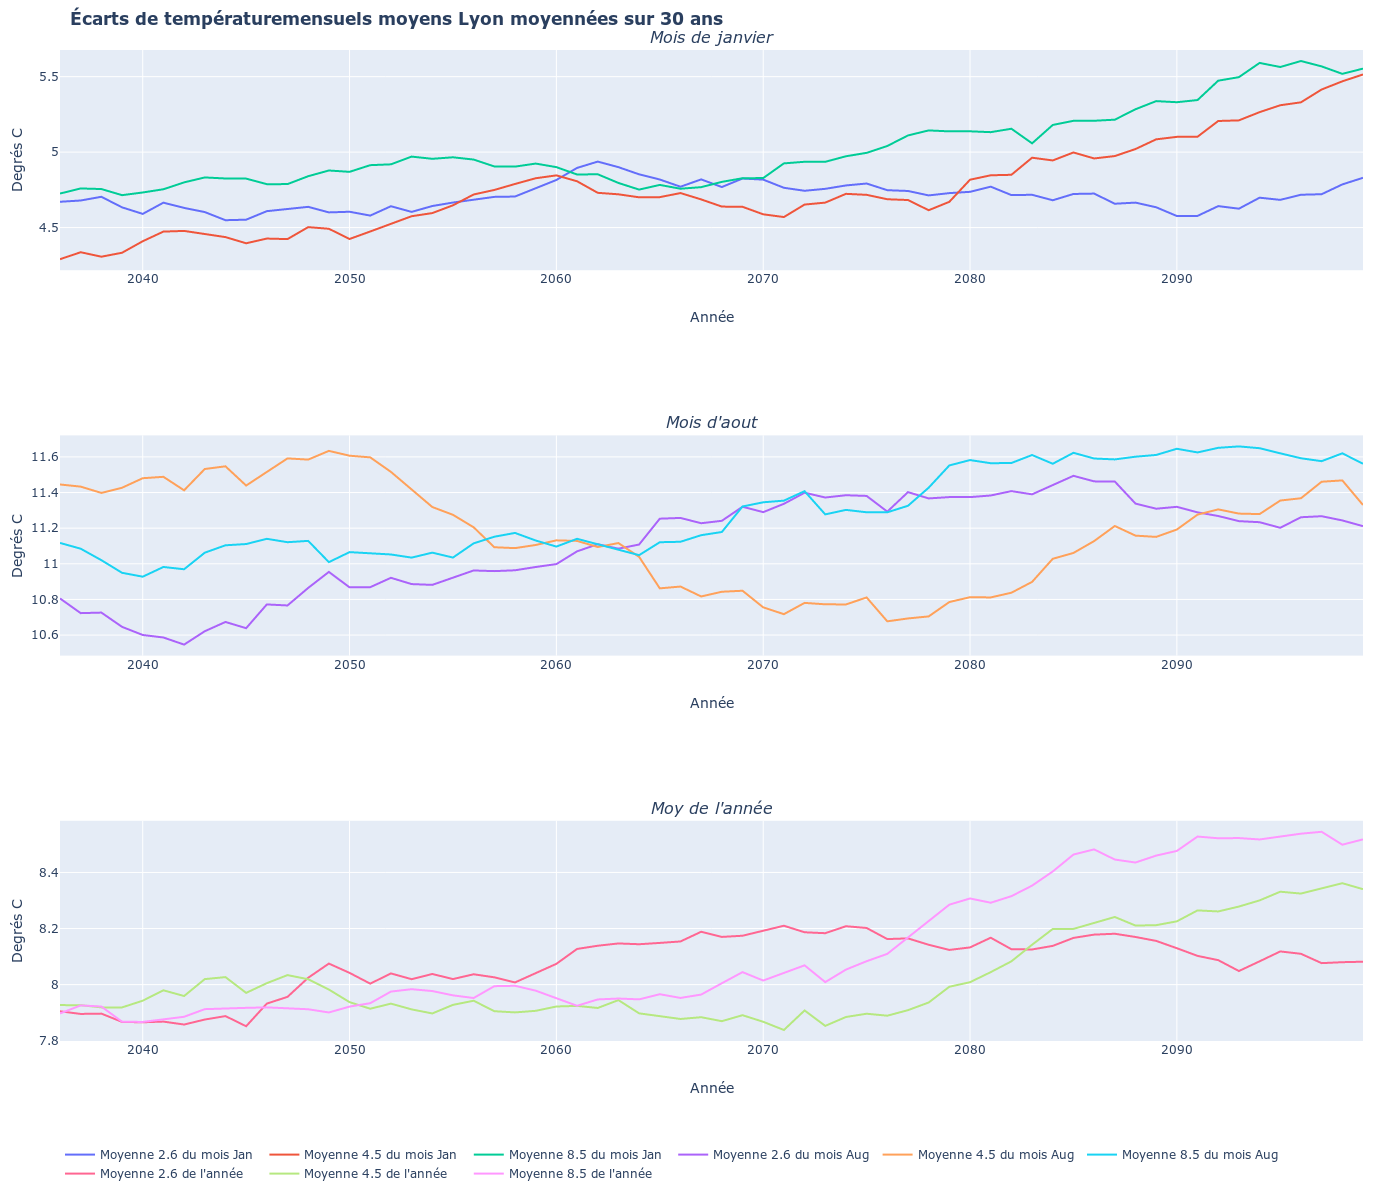

In [71]:
q = 0
trace26_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Lyon_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Lyon_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Lyon_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
trace45_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_45[q,:],
    name ="Moyenne 4.5 de l'année"
)

trace85_2 = go.Scatter(
    x = Lyon_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_85[q,:],
    name ="Moyenne 8.5 de l'année"
)

fig = subplots.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("<i>Mois de janvier</i>","<i>Mois d'aout</i>","<i>Moy de l'année</i>"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=3, col=1)

fig.update_yaxes(title_text="Degrés C", row=1, col=1)
fig.update_yaxes(title_text="Degrés C", row=2, col=1)
fig.update_yaxes(title_text="Degrés C", row=3, col=1)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='<b>Écarts de températuremensuels moyens Lyon moyennées sur 30 ans</b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

In [15]:
pio.write_json(fig, 'scatter2.plotly')

In [27]:
fig_styled = pio.read_json('scatter2+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

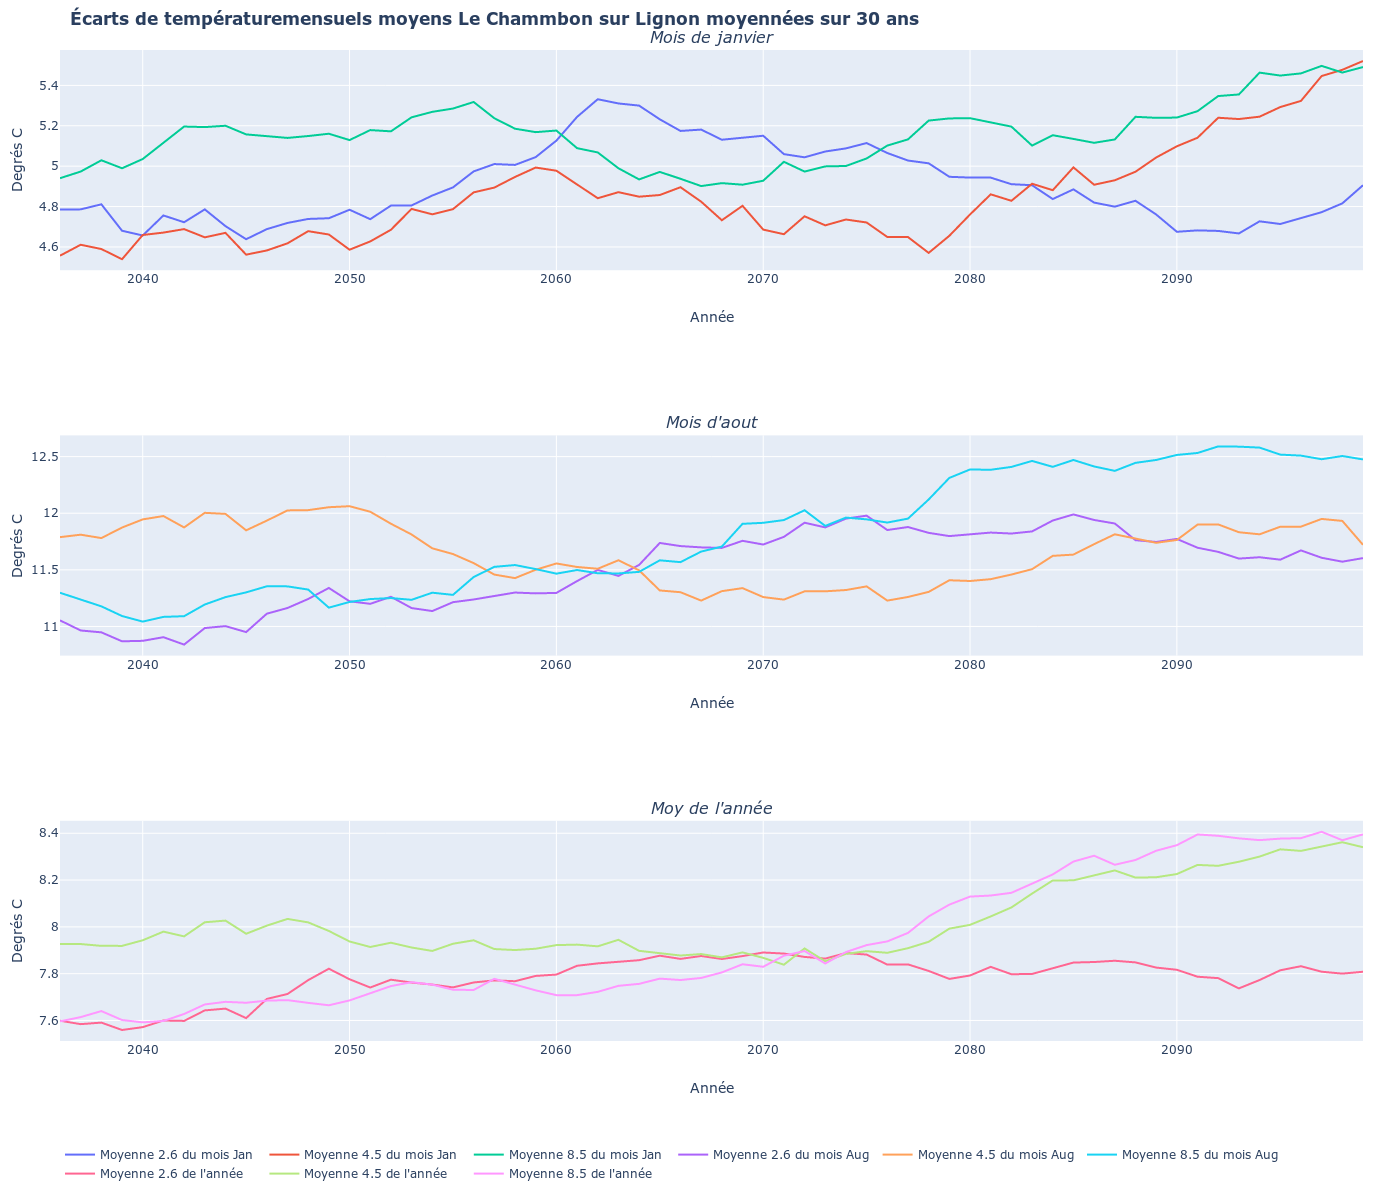

In [72]:
q = 0
trace26_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_LeCh_26[q,:],
    name ='Moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_LeCh_45[q,:],
    name ='Moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_LeCh_85[q,:],
    name ='Moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_LeCh_26[q,:],
    name ='Moyenne 2.6 du mois %s'%LeCh_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_LeCh_45[q,:],
    name ='Moyenne 4.5 du mois %s'%LeCh_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_LeCh_85[q,:],
    name ='Moyenne 8.5 du mois %s'%LeCh_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_LeCh_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
trace45_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_Lyon_45[q,:],
    name ="Moyenne 4.5 de l'année"
)

trace85_2 = go.Scatter(
    x = LeCh_year[firstPlotYear:lastPlotYear],
    y = moyDAreaInterval_LeCh_85[q,:],
    name ="Moyenne 8.5 de l'année"
)

fig = subplots.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("<i>Mois de janvier</i>","<i>Mois d'aout</i>","<i>Moy de l'année</i>"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig.update_xaxes(title_text="Année", row=1, col=1)
fig.update_xaxes(title_text="Année", row=2, col=1)
fig.update_xaxes(title_text="Année", row=3, col=1)

fig.update_yaxes(title_text="Degrés C", row=1, col=1)
fig.update_yaxes(title_text="Degrés C", row=2, col=1)
fig.update_yaxes(title_text="Degrés C", row=3, col=1)

fig['layout']['margin'] = {'l': 60, 'r': 30, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='<b>Écarts de températuremensuels moyens Le Chammbon sur Lignon moyennées sur 30 ans</b>')

fig.update_layout(legend_orientation="h")

py.iplot(fig, filename='basic-line')

In [15]:
pio.write_json(fig, 'scatter2.plotly')

In [27]:
fig_styled = pio.read_json('scatter2+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

In [36]:
# Using online file takes a little more time
# Calculate the number of years yielding a result
moypAreaInterval_26 = np.zeros((lencalcMonths, nbYears))
moypAreaInterval_45 = np.zeros((lencalcMonths, nbYears))
moypAreaInterval_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moypAreaInterval_26[:, p] = np.mean(Tlse_rstr26[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moypAreaInterval_45[:, p] = np.mean(Tlse_rstr45[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moypAreaInterval_85[:, p] = np.mean(Tlse_rstr85[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriod
data = [] #* lencalcMonths
trace = [] #* lencalcMonths# Using online file takes a little more time

In [82]:
q = 0
trace26_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]],
)
trace45_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]],
)
trace85_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]],
)

q = 1
trace26_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]],
)
trace45_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]],
)

trace85_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]],
    opacity=0.75
)

q = 2
trace26_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]],
)
trace45_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]],
)

trace85_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]],
)

fig = tools.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("mois de janvier",
                                          "mois d'aout",
                                          "moyenne mensuelle sur l'année"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig['layout']['xaxis1'].update(title='Année')
fig['layout']['xaxis2'].update(title='Année')
fig['layout']['xaxis3'].update(title='Année')
fig['layout']['yaxis1'].update(title='mm of rain')
fig['layout']['yaxis2'].update(title='mm of rain')
fig['layout']['yaxis3'].update(title='mm of rain')
fig['layout'].update(height=1200, width=900, title='Précipitations moyennées sur 30 ans')
#fig['layout']['margin'] = {'l': 50, 'r': 10, 'b': 50, 't': 50}
#fig['layout'].update(title='Température moyenne maximale du mois de juillet', 
#                     autosize=False, width=800, height=380)  

#py.iplot(fig, filename='basic-line')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'mois de janvier',
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': "mois d'aout",
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.6111111111111112,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': "moyenne mensuelle sur l'année",
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
             

#### Modifications et enrichissement de la figure

In [20]:
pio.write_json(fig, 'scatter3.plotly')

In [26]:
fig_styled = pio.read_json('scatter3+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

In [38]:
# Using online file takes a little more time
# Calculate the number of years yielding a result
moycAreaInterval_26 = np.zeros((lencalcMonths, nbYears))
moycAreaInterval_45 = np.zeros((lencalcMonths, nbYears))
moycAreaInterval_85 = np.zeros((lencalcMonths, nbYears))
# Tmax, i and j are computed to localize the mean
for p in range(startYear, endYear) :
    a = startYear + p
    b = a + yearInterval
    moycAreaInterval_26[:, p] = np.mean(Tlse_rstrc26[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moycAreaInterval_45[:, p] = np.mean(Tlse_rstrc45[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
    moycAreaInterval_85[:, p] = np.mean(Tlse_rstrc85[a:b, calcMonth, startj:endj, starti:endi], axis=(0, 2, 3))
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriod
data = [] #* lencalcMonths
trace = [] #* lencalcMonths# Using online file takes a little more time

In [83]:
q = 0
trace26_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]],
)
trace45_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]],
)
trace85_0 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]],
)

q = 1
trace26_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'

)
trace45_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'
)

trace85_1 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]],    
    xaxis='x2',
    yaxis='y2'
)

q = 2
trace26_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%Tlse_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'

)
trace45_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%Tlse_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'
)

trace85_2 = go.Scatter(
    x = Tlse_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%Tlse_month[calcMonth[q]],    
    xaxis='x2',
    yaxis='y2'
)

fig = tools.make_subplots(rows=3, 
                          cols=1,
                          subplot_titles=("Mois de janvier",
                                          "Mois d'aout",
                                          "Cumul annuel de précipitations")
)

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)
fig['layout']['xaxis1'].update(title='Année')
fig['layout']['xaxis2'].update(title='Année')
fig['layout']['xaxis3'].update(title='Année')
fig['layout']['yaxis1'].update(title='mm of rain')
fig['layout']['yaxis2'].update(title='mm of rain')
fig['layout']['yaxis3'].update(title='mm of rain')
fig['layout'].update(height=1200, width=1000, title='Précipitations cumulées moyennées sur 30 ans"')

#py.iplot(fig, filename='basic-line')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Mois de janvier',
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': "Mois d'aout",
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.6111111111111112,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Cumul annuel de précipitations',
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
            

#### Modifications et enrichissement de la figure

In [24]:
pio.write_json(fig, 'scatter4.plotly')

In [25]:
fig_styled = pio.read_json('scatter4+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

## Approche cartographique des températures aux environs de Toulouse

In [84]:
trace0 = go.Heatmap(z = Tlse_tmax26[34,7,:,:].tolist(), zauto=False, zmin=29,zmax=33)
trace1 = go.Heatmap(z = Tlse_tmax26[34, 12, :,:].tolist(), zauto=False, zmin=29,zmax=33)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('aout 2040','Année 2040'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout']['xaxis1'].update(title='Aladin grid J')
fig['layout']['xaxis2'].update(title='Aladin grid J')
fig['layout']['yaxis1'].update(title='Aladin grid I')
fig['layout'].update(title="Température maximale moyenne du mois d'aout ' scénarios 2.6", 
                     autosize=False, width=800, height=500)  
#py.iplot(fig, filename='basic-heatmap')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'aout 2040',
                     'x': 0.225,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Année 2040',
                     'x': 0.775,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'}],
    'autosize': False,
    'height': 500,
    'title': {'text': "Température maximale moyenne du mois d'aout ' scénarios 2.6"},
    'width': 800,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45], 'title': {'text': 'Aladin grid J'}},
    'xaxis2': {'anchor': 'y2', 'domain': [0.55, 1.0]

In [85]:
trace0 = go.Heatmap(z = Tlse_tmin26[34,11,:,:].tolist(), zauto=False, zmin=-1,zmax=3)
trace1 = go.Heatmap(z = Tlse_tmin26[34, 12, :,:].tolist(), zauto=False, zmin=-1,zmax=3)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('janvier 2040','Année 2040'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout']['xaxis1'].update(title='Aladin grid J')
fig['layout']['xaxis2'].update(title='Aladin grid J')
fig['layout']['yaxis1'].update(title='Aladin grid I')
fig['layout'].update(title="Température minimale moyenne du mois d'aout ' scénarios 2.6", 
                     autosize=False, width=800, height=500)  
#py.iplot(fig, filename='basic-heatmap')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'janvier 2040',
                     'x': 0.225,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Année 2040',
                     'x': 0.775,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'}],
    'autosize': False,
    'height': 500,
    'title': {'text': "Température minimale moyenne du mois d'aout ' scénarios 2.6"},
    'width': 800,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45], 'title': {'text': 'Aladin grid J'}},
    'xaxis2': {'anchor': 'y2', 'domain': [0.55, 1

In [86]:
trace0 = go.Heatmap(z = Tlse_tmax26[94,7,:,:].tolist(), zauto=False, zmin=29,zmax=33)
trace1 = go.Heatmap(z = Tlse_tmax26[94, 12, :,:].tolist(), zauto=False, zmin=29,zmax=33)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('aout 2100','Année 2100'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout']['xaxis1'].update(title='Aladin grid J')
fig['layout']['xaxis2'].update(title='Aladin grid J')
fig['layout']['yaxis1'].update(title='Aladin grid I')
fig['layout'].update(title="Température maximale moyenne du mois d'aout ' scénarios 2.6", 
                     autosize=False, width=800, height=500)  
#py.iplot(fig, filename='basic-heatmap')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'aout 2100',
                     'x': 0.225,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Année 2100',
                     'x': 0.775,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'}],
    'autosize': False,
    'height': 500,
    'title': {'text': "Température maximale moyenne du mois d'aout ' scénarios 2.6"},
    'width': 800,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45], 'title': {'text': 'Aladin grid J'}},
    'xaxis2': {'anchor': 'y2', 'domain': [0.55, 1.0]

In [27]:
#### Modifications et enrichissement de la figure

In [27]:
pio.write_json(fig, 'scatter5.plotly')

In [24]:
fig_styled = pio.read_json('scatter5+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

#### Comparaison de 3 horizons pour le mois de juillet en région lyonnaise
Ce bloc utilise les données mises en forme dans le bloc précédent pour afficher une comparaison entre  3 horizons. (Décommenter la dernière ligne du bloc pour afficher la figure)

In [87]:
trace00 = go.Heatmap(z=Tlse_tmax26[23,2,:,:].tolist(), zauto=False, zmin=10,zmax=15)
trace01 = go.Heatmap(z=Tlse_tmax26[53,2,:,:].tolist(), zauto=False, zmin=10,zmax=15)
trace02 = go.Heatmap(z=Tlse_tmax26[93,2,:,:].tolist(), zauto=False, zmin=10,zmax=15)
trace10 = go.Heatmap(z=Tlse_tmax45[23,2,:,:].tolist(), zauto=False, zmin=10,zmax=15)
trace11 = go.Heatmap(z=Tlse_tmax45[53,2,:,:].tolist(), zauto=False, zmin=10,zmax=15)
trace12 = go.Heatmap(z=Tlse_tmax45[93,2,:,:].tolist(), zauto=False, zmin=10,zmax=15)
trace20 = go.Heatmap(z=Tlse_tmax85[23,2,:,:].tolist(), zauto=False, zmin=10,zmax=15)
trace21 = go.Heatmap(z=Tlse_tmax85[53,2,:,:].tolist(), zauto=False, zmin=10,zmax=15)
trace22 = go.Heatmap(z=Tlse_tmax85[93,2,:,:].tolist(), zauto=False, zmin=10,zmax=15)

fig = tools.make_subplots(rows=3, cols=3, subplot_titles=('Année 2030','Année 2050','Année 2100'))

fig.append_trace(trace00, 1, 1)
fig.append_trace(trace01, 1, 2)
fig.append_trace(trace02, 1, 3)
fig.append_trace(trace10, 2, 1)
fig.append_trace(trace11, 2, 2)
fig.append_trace(trace12, 2, 3)
fig.append_trace(trace20, 3, 1)
fig.append_trace(trace21, 3, 2)
fig.append_trace(trace22, 3, 3)

fig['layout']['xaxis1'].update(title='Aladin grid J')
fig['layout']['xaxis2'].update(title='Aladin grid J')
fig['layout']['xaxis3'].update(title='Aladin grid J')
fig['layout']['yaxis1'].update(title='Aladin grid I')
fig['layout'].update(title='Température maximale moyenne du mois de Mars scénarios 2.6 4.5 8.5', 
                     autosize=False, width=800, height=1100)  

#py.iplot(fig, filename='basic-heatmap')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Année 2030',
                     'x': 0.14444444444444446,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Année 2050',
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Année 2100',
                     'x': 0.8555555555555556,
                     'xanchor': 'center',
                     'xref': 'paper',
                     '

#### Modifications et enrichissement de la figure

In [30]:
pio.write_json(fig, 'scatter6.plotly')

In [23]:
fig_styled = pio.read_json('scatter6+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

In [64]:
startYear = 44
endYear =74
slice = lenmonths - 1 # slice = lenmonths pour traiter en plus la moyenne annuelle 
moyAreaInterval1 = [None] * slice
moyAreaInterval2 = [None] * slice
moyAreaInterval3 = [None] * slice
moyAreaInterval1[:] = np.mean(Tlse_tmax26[startYear:endYear,:,startj:endj,starti:endi],axis=(0,2,3)) 
moyAreaInterval2[:] = np.mean(Tlse_tmax45[startYear:endYear,:,startj:endj,starti:endi],axis=(0,2,3)) 
moyAreaInterval3[:] = np.mean(Tlse_tmax85[startYear:endYear,:,startj:endj,starti:endi],axis=(0,2,3)) 
#print(moyAreaInterval[0:slice])
with open('moyMonth.txt', 'w') as file :
    for p in range(slice) :
        file.write(Tlse_month[p])
        file.write(';')
        file.write(str(moyAreaInterval1[p]))
        file.write(str(moyAreaInterval2[p]))
        file.write(str(moyAreaInterval3[p]))
        file.write('\n')

In [88]:
trace0 = go.Scatter(
    x = Tlse_month[0:slice],
    y = moyAreaInterval1[0:slice],
    name ='scenario 2.6'
)
trace1 = go.Scatter(
    x = Tlse_month[0:slice],
    y = moyAreaInterval2[0:slice],
    name ='scenario 4.5'
)
trace2 = go.Scatter(
    x = Tlse_month[0:slice],
    y = moyAreaInterval3[0:slice],
    name ='scenario 8.5'
)

data = [trace0,trace1,trace2]

layout = dict (
           title = "Température moyenne maximale des mois de l'année 2050",
           xaxis = dict(
                 title = 'Mois',
                 showline=True,
                 showticklabels=True,
                 ticklen=5
             ),
             yaxis = dict(
                 title = 'Temperature (degrees Celsius)',
                 showline=True,
                 showticklabels=True
             ),
            height = 800,
            autosize=False, 
            width=850,
)


fig = dict(data=data, layout=layout)

#py.iplot(fig, filename='basic-line')

#### Modifications et enrichissement de la figure

In [36]:
pio.write_json(fig, 'scatter7.plotly')

In [22]:
fig_styled = pio.read_json('scatter7+.plotly', output_type='FigureWidget')
#py.iplot(fig_styled, filename='styled-basic-line')

### Contrôle du contenu du fichier sauvegardé 
Ce bloc permet d'imprimer le contenu du jeu de données qui vient d'être sauvegardé afin de vérifier qu'il contient les données attendues. le suivant ferme le fichier écrit.

In [15]:
#for dim in extractLyonTempYearMonth.dimensions.items():
#    print(dim[1])
#for var in extractLyonTempYearMonth.variables.keys() :
#    print (var, '\t\t', extractLyonTempYearMonth.variables[var].dimensions, '\t\t', 
#           extractLyonTempYearMonth.variables[var].shape, '\t', extractLyonTempYearMonth.variables[var].dtype)